In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Global Measures

## Single Experiment

In [3]:
I = 30          # iterations
N_PEDS = 75     # percentage of pedestrians
N_CARS = 25     # percentage of cars
MODEL = "new"   # type of the model ('base' or 'new')

### Percentage of Evacuated

In [4]:
total_dfs = []
cars_dfs = []
peds_dfs = []

for i in range(1, I + 1):
    data = pd.read_csv(f"./data/{MODEL}/evacuated/evacuated-{N_PEDS}-{N_CARS}-{i}.csv", skiprows=18)

    tot_evac = data[['x', 'y']].copy()
    tot_evac["i"] = i
    #tot_evac["cat"] = "evacuated"

    cars_evac = data[['x.1', 'y.1']].copy()
    cars_evac["i"] = i
    #cars_evac["cat"] = "cars"
    #cars_evac = cars_evac.rename(columns={'x.1':'x', 'y.1':'y'})

    peds_evac = data[['x.2', 'y.2']].copy()
    peds_evac["i"] = i
    #peds_evac["cat"] = "pedestrians"
    #peds_evac = peds_evac.rename(columns={'x.2':'x', 'y.2':'y'})

    # xx = pd.concat([tot_evac, cars_evac, peds_evac])

    #total_dfs.append(xx)

    total_dfs.append(tot_evac)
    cars_dfs.append(cars_evac)
    peds_dfs.append(peds_evac)

t_df = pd.concat(total_dfs).reset_index() # drop=True
c_df = pd.concat(cars_dfs).reset_index()
p_df = pd.concat(peds_dfs).reset_index()

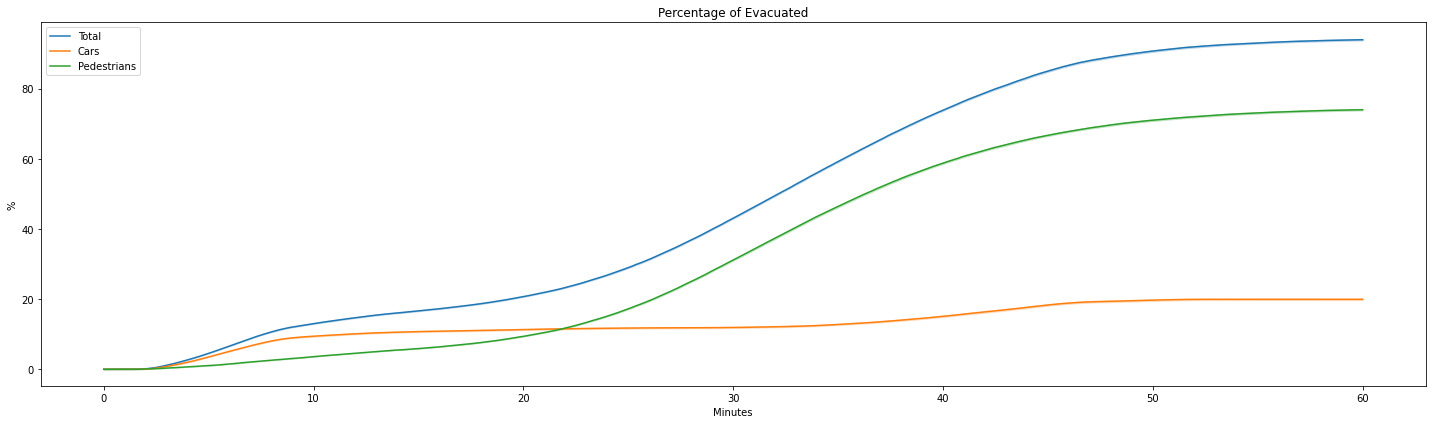

In [5]:
fig = plt.figure(figsize=(20, 6))
ax = sns.lineplot(x=t_df["x"], y=t_df["y"], label="Total") #  hue=t_df["cat"]
ax.set_title("Percentage of Evacuated")
ax.set_xlabel("Minutes")
ax.set_ylabel("%")
sns.lineplot(x=c_df["x.1"], y=c_df["y.1"], label="Cars")
sns.lineplot(x=p_df["x.2"], y=p_df["y.2"], label="Pedestrians")
fig.tight_layout()

### Casualties

In [6]:
total_dfs = []
cars_dfs = []
peds_dfs = []

for i in range(1, I + 1):
    data = pd.read_csv(f"./data/{MODEL}/casualties/casualties-{N_PEDS}-{N_CARS}-{i}.csv", skiprows=18)

    tot_evac = data[['x', 'y']].copy()
    tot_evac["i"] = i
    #tot_evac["cat"] = "evacuated"

    cars_evac = data[['x.1', 'y.1']].copy()
    cars_evac["i"] = i
    #cars_evac["cat"] = "cars"
    #cars_evac = cars_evac.rename(columns={'x.1':'x', 'y.1':'y'})

    peds_evac = data[['x.2', 'y.2']].copy()
    peds_evac["i"] = i
    #peds_evac["cat"] = "pedestrians"
    #peds_evac = peds_evac.rename(columns={'x.2':'x', 'y.2':'y'})

    # xx = pd.concat([tot_evac, cars_evac, peds_evac])

    #total_dfs.append(xx)

    total_dfs.append(tot_evac)
    cars_dfs.append(cars_evac)
    peds_dfs.append(peds_evac)

t_df = pd.concat(total_dfs).reset_index() # drop=True
c_df = pd.concat(cars_dfs).reset_index()
p_df = pd.concat(peds_dfs).reset_index()

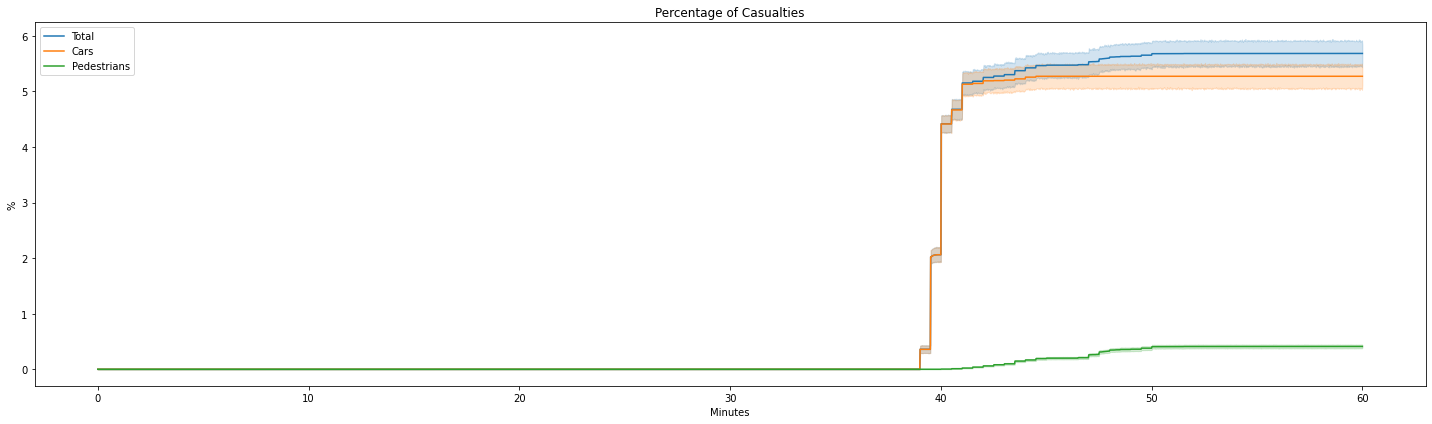

In [7]:
fig = plt.figure(figsize=(20, 6))
ax = sns.lineplot(x=t_df["x"], y=t_df["y"], label="Total") #  hue=t_df["cat"]
ax.set_title("Percentage of Casualties")
ax.set_xlabel("Minutes")
ax.set_ylabel("%")
sns.lineplot(x=c_df["x.1"], y=c_df["y.1"], label="Cars")
sns.lineplot(x=p_df["x.2"], y=p_df["y.2"], label="Pedestrians")
fig.tight_layout()

### Evacuation Times

In [8]:
# averaged times
df = pd.DataFrame({"y" : [0] * 60}, index=range(1, 61))

for i in range(1, I + 1):
    data = pd.read_csv(f"./data/{MODEL}/times/times-{N_PEDS}-{N_CARS}-{i}.csv", skiprows=18)
    data = data[['x', 'y']].set_index("x")
    data = data.reindex(range(1, 61), fill_value=0)
    df = df + data

df = df / I
df = df.reset_index()
df.columns = ["x", "y"]

In [9]:
# confidence interval
df = []
for i in range(1, I + 1):
    data = pd.read_csv(f"./data/{MODEL}/times/times-{N_PEDS}-{N_CARS}-{i}.csv", skiprows=18)
    data = data[['x', 'y']].set_index("x")
    data['i'] = i
    data = data.reindex(range(1, 61), fill_value=0)
    df.append(data)
    
df = pd.concat(df).reset_index()

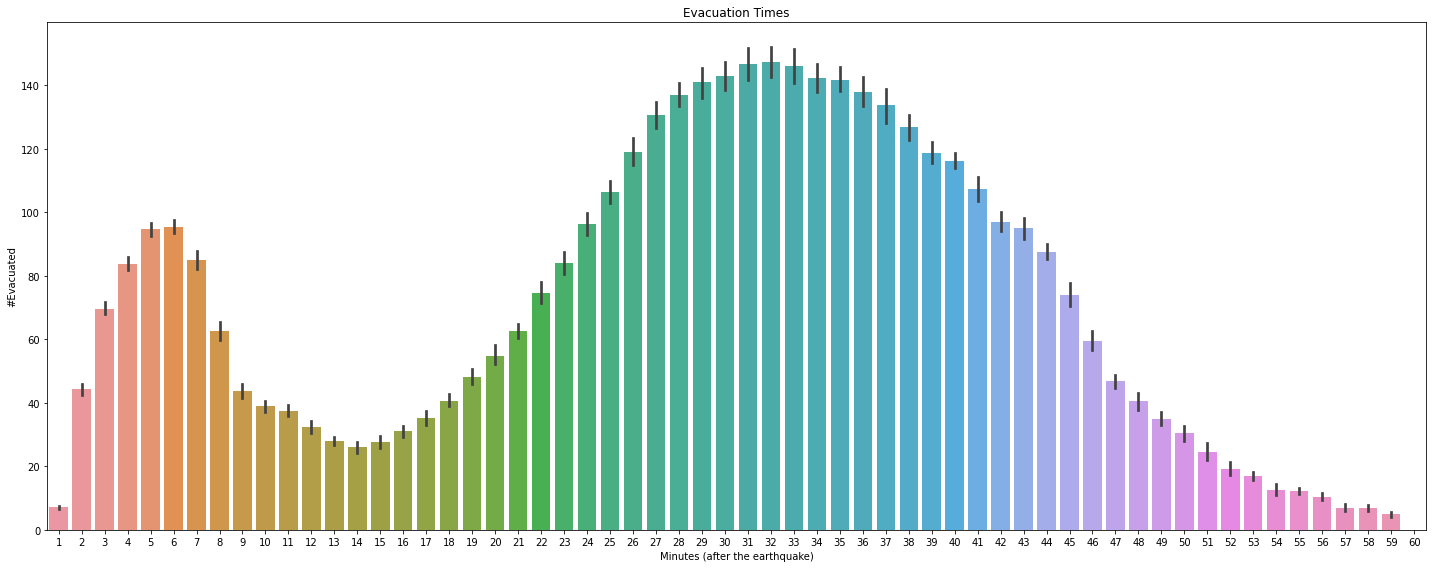

In [10]:
fig = plt.figure(figsize=(20, 8))
ax = sns.barplot(x=df['x'], y=df['y'])
ax.set_title("Evacuation Times")
ax.set_xlabel("Minutes (after the earthquake)")
ax.set_ylabel("#Evacuated")
fig.tight_layout()

## Comparisons

In [2]:
I = 30          # iterations

exps = [
    { "N_PEDS": 0, "N_CARS": 100 },
    { "N_PEDS": 25, "N_CARS": 75 },
    { "N_PEDS": 50, "N_CARS": 50 },
    { "N_PEDS": 75, "N_CARS": 25 },
    { "N_PEDS": 100, "N_CARS": 0 },
]

models = ["base", "new"]

## Evacuated, Casualties, Times

In [3]:
def plot_comparisons(model, measure, normalize=False, ylim=[0, 100.5]):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey=True, sharex=True)
    axes = axes.flatten()

    axes[0].set_title(f"Pedestrians")
    axes[0].set_xlabel("Minutes")
    axes[0].set_ylabel(f"% {measure.capitalize()}")
    axes[0].set_ylim(ylim)
    axes[0].set_xlim([0, 60])

    axes[1].set_title(f"Cars")
    axes[1].set_xlabel("Minutes")
    axes[1].set_ylabel(f"% {measure.capitalize()}")
    axes[1].set_ylim(ylim)
    axes[1].set_xlim([0, 60])

    axes[2].set_title(f"Total")
    axes[2].set_xlabel("Minutes")
    axes[2].set_ylabel(f"% {measure.capitalize()}")
    axes[2].set_ylim(ylim)
    axes[2].set_xlim([0, 60])

    labels = [f"Pedestrians: {exp['N_PEDS']}%, Cars: {exp['N_CARS']}%" for exp in exps]

    for i, exp in enumerate(exps):
        avg_data = pd.DataFrame()
        for k in range(1, I + 1):
            data = pd.read_csv(f"./data/{model}/{measure}/{measure}-{exp['N_PEDS']}-{exp['N_CARS']}-{k}.csv", skiprows=18)
            data["i"] = k

            avg_data = pd.concat((data, avg_data))
        
        tot_avg_data = avg_data[["x", "y"]]
        car_avg_data = avg_data[["x.1", "y.1"]]
        ped_avg_data = avg_data[["x.2", "y.2"]]

        tot_groups = tot_avg_data.groupby(tot_avg_data.index)
        car_groups = car_avg_data.groupby(car_avg_data.index)
        ped_groups = ped_avg_data.groupby(ped_avg_data.index)

        tot_avg_data = tot_groups[["x", "y"]].mean()
        cars_avg_data = car_groups[["x.1", "y.1"]].mean()
        peds_avg_data = ped_groups[["x.2", "y.2"]].mean()
       
        if normalize:
            cars_avg_data["y.1"] = cars_avg_data["y.1"] / (exp['N_CARS'] / 100)
            peds_avg_data["y.2"] = peds_avg_data["y.2"] / (exp['N_PEDS'] / 100)

        lbl = f"Pedestrians: {exp['N_PEDS']}%, Cars: {exp['N_CARS']}%"
        
        if exp['N_PEDS'] != 0:
            sns.lineplot(peds_avg_data, x="x.2", y="y.2", ax=axes[0], label=lbl, legend=False)
        else:
            sns.lineplot(tot_avg_data, x="x", y=0, ax=axes[0], label=lbl, legend=False)
        
        if exp['N_CARS'] != 0:
            sns.lineplot(cars_avg_data, x="x.1", y="y.1", ax=axes[1], label=lbl, legend=False)
        else:
            sns.lineplot(tot_avg_data, x="x", y=0, ax=axes[1], label=lbl, legend=False)

        sns.lineplot(tot_avg_data, x="x", y="y", ax=axes[2], label=lbl, legend=False)

    
    handles, labels = axes[2].get_legend_handles_labels()
    fig.legend(handles=handles, labels=labels, loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=5)
    fig.tight_layout()

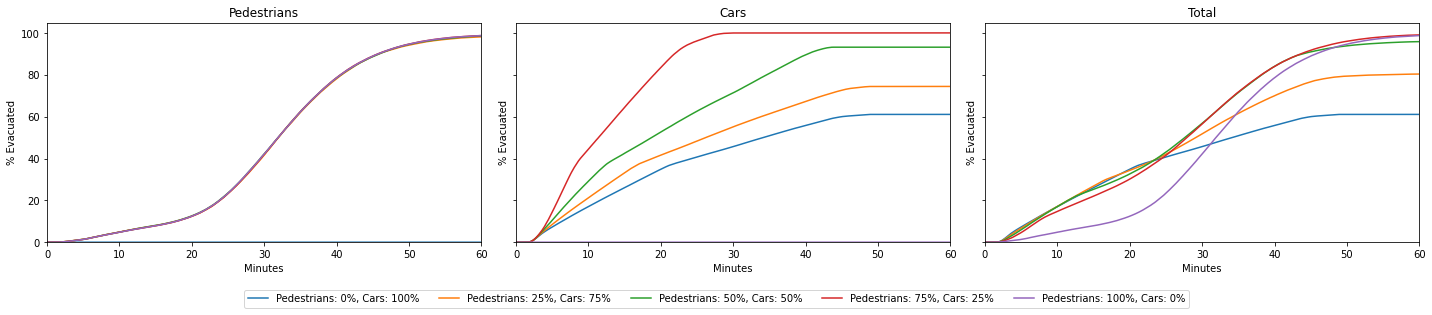

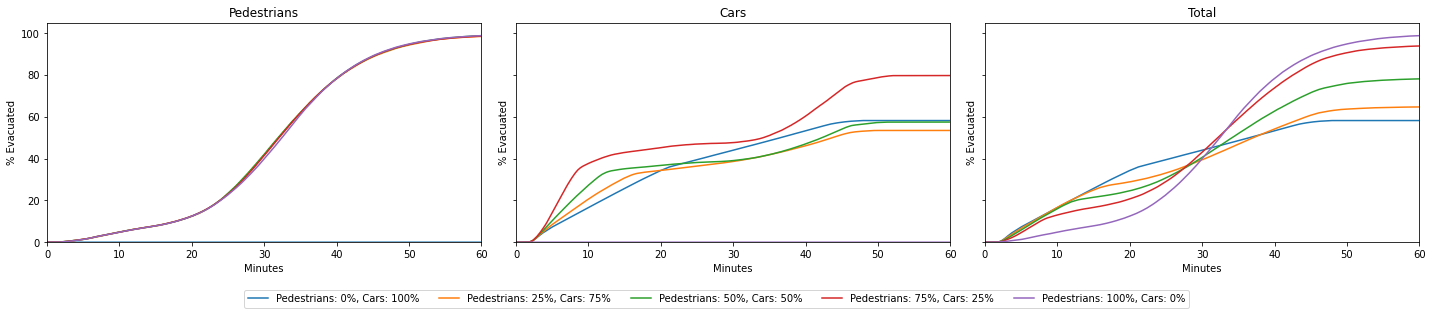

In [10]:
plot_comparisons("base", "evacuated", normalize=True, ylim=[0, 105])
#plot_comparisons("new_const", "evacuated")
plot_comparisons("new", "evacuated", normalize=True, ylim=[0, 105])

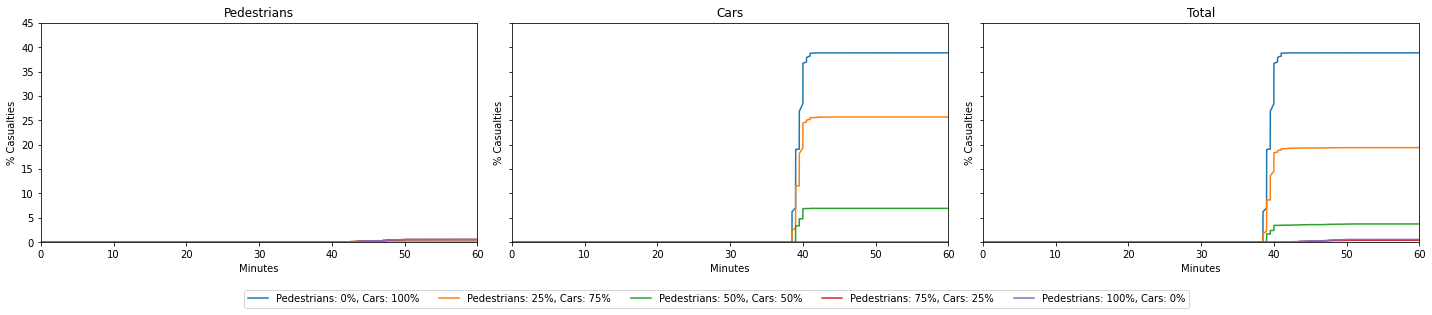

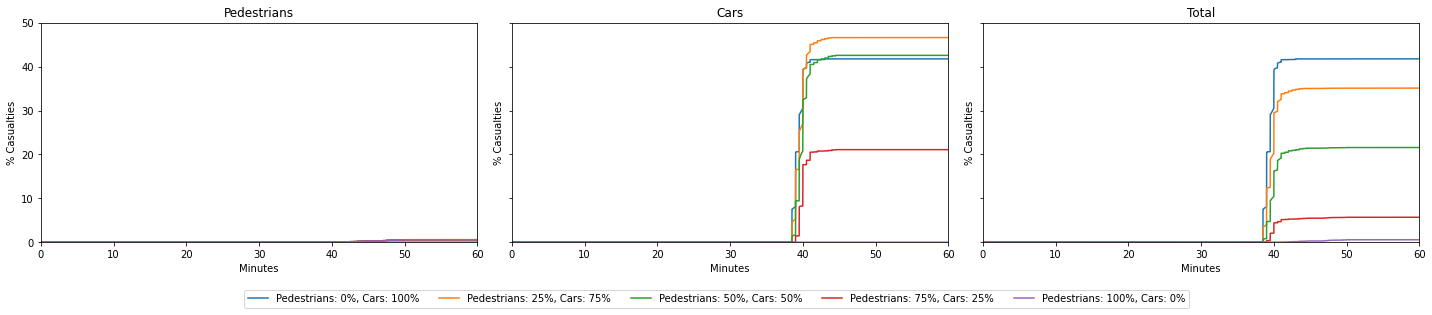

In [9]:
plot_comparisons("base", "casualties", normalize=True, ylim=[0, 45])
#plot_comparisons("new_const", "casualties")
plot_comparisons("new", "casualties", normalize=True, ylim=[0, 50])

In [6]:
def prova(models, measure, mode="total", normalize=False, horizontal=False):
    skip_empty = normalize and mode != "total"
    N = 4 if skip_empty else 5

    nrows = 1
    ncols = N
    figsize = (25, 3)
    bbox_to_anchor = (0.5, -0.1)

    if horizontal:
        nrows = N
        ncols = 1
        figsize = (6, 10)
        bbox_to_anchor = (0.5, -0.05)

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, sharey=True, sharex=True)
    axes = axes.flatten()

    for model in models:
        for i in range(N):
            exp = exps[i]

            if skip_empty and mode == "pedestrians":
                exp = exps[i + 1]
 
            lbl = f"Pedestrians: {exp['N_PEDS']}%, Cars: {exp['N_CARS']}%"
            axes[i].set_title(lbl)

            # if measure == "casualties":
            #     axes[i].set_ylim([0, 40])

            avg_data = pd.DataFrame()
            for k in range(1, I + 1):
                data = pd.read_csv(f"./data/{model}/{measure}/{measure}-{exp['N_PEDS']}-{exp['N_CARS']}-{k}.csv", skiprows=18)
                data["i"] = k

                avg_data = pd.concat((data, avg_data))
            
            tot_avg_data = avg_data[["x", "y"]]
            car_avg_data = avg_data[["x.1", "y.1"]]
            ped_avg_data = avg_data[["x.2", "y.2"]]

            tot_groups = tot_avg_data.groupby(tot_avg_data.index)
            car_groups = car_avg_data.groupby(car_avg_data.index)
            ped_groups = ped_avg_data.groupby(ped_avg_data.index)

            tot_avg_data = tot_groups[["x", "y"]].mean()
            cars_avg_data = car_groups[["x.1", "y.1"]].mean()
            peds_avg_data = ped_groups[["x.2", "y.2"]].mean()
        
            if normalize:
                cars_avg_data["y.1"] = cars_avg_data["y.1"] / (exp['N_CARS'] / 100)
                peds_avg_data["y.2"] = peds_avg_data["y.2"] / (exp['N_PEDS'] / 100)

            if mode == "pedestrians":
                if exp['N_PEDS'] != 0:
                    sns.lineplot(peds_avg_data, x="x.2", y="y.2", ax=axes[i], label=model, legend=False)
                else:
                    sns.lineplot(tot_avg_data, x="x", y=0, ax=axes[i], label=model, legend=False)
            elif mode == "cars":
                if exp['N_CARS'] != 0:
                    sns.lineplot(cars_avg_data, x="x.1", y="y.1", ax=axes[i], label=model, legend=False)
                else:
                    sns.lineplot(tot_avg_data, x="x", y=0, ax=axes[i], label=model, legend=False)
            else:
                sns.lineplot(tot_avg_data, x="x", y="y", ax=axes[i], label=model, legend=False)
 
            axes[i].set_ylabel(f"% {measure.capitalize()}")
            axes[i].set_xlabel("Minutes")

    handles, labels = axes[2].get_legend_handles_labels()
    labels = [l.replace("new", "esteso") for l in labels]
    fig.legend(handles=handles, labels=labels, loc="lower center", bbox_to_anchor=bbox_to_anchor, ncol=5)
    fig.tight_layout()

In [ ]:
# cars
prova(models, "evacuated", mode="cars", normalize=True)
prova(models, "casualties", mode="cars", normalize=True)

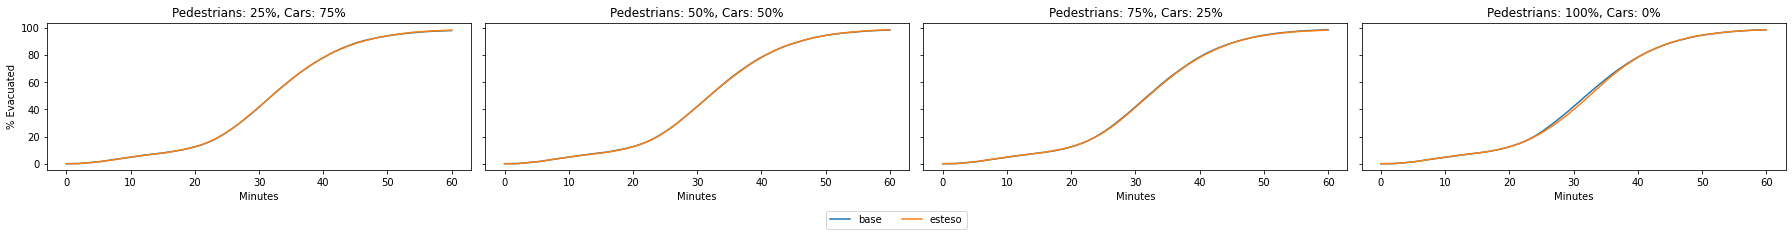

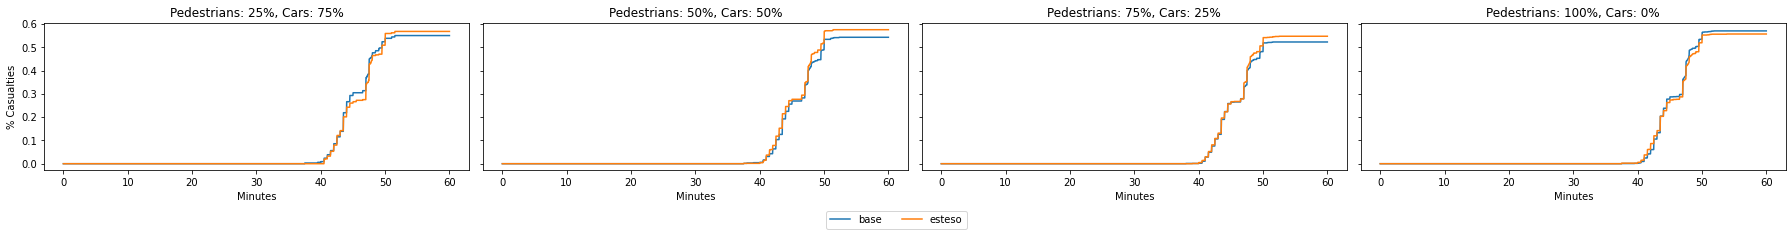

In [8]:
# pedestrians
prova(models, "evacuated", mode="pedestrians", normalize=True)
prova(models, "casualties", mode="pedestrians", normalize=True)

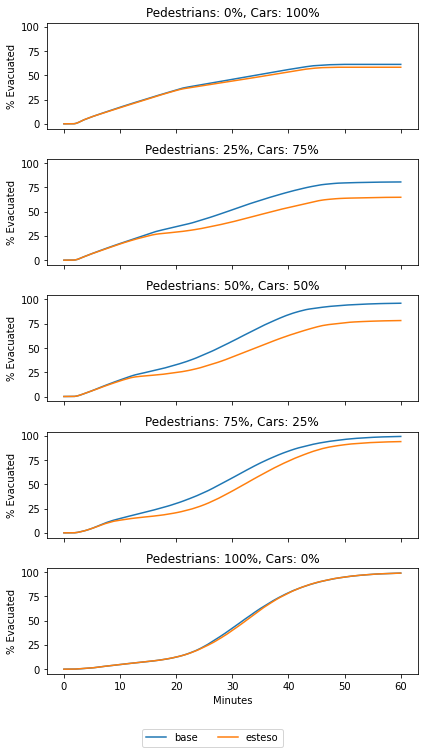

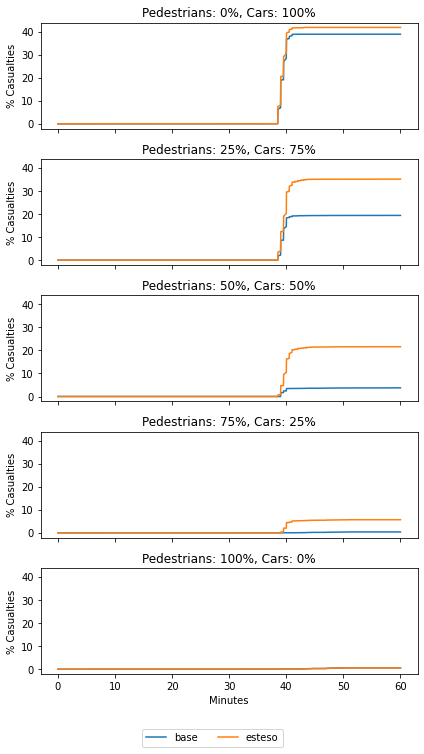

In [9]:
# total
prova(models, "evacuated", mode="total", normalize=False, horizontal=True)
prova(models, "casualties", mode="total", normalize=False, horizontal=True)

In [45]:
def plot_evacuation_times(models, mean=False):
    fig, ax = plt.subplots(len(exps), 1, figsize=(10, 10), sharex=True, sharey=True)
    ax = ax.flatten()
    
    legend = len(models) > 1

    colors = sns.color_palette()

    for i, exp in enumerate(exps):
        
        means = []
        for j, model in enumerate(models):
            avg_data = None
            for k in range(1, I + 1):
                data = pd.read_csv(f"./data/{model}/times/times-{exp['N_PEDS']}-{exp['N_CARS']}-{k}.csv", skiprows=18)

                means.append(data['x.1'][0])

                data = data[['x', 'y']].set_index("x")
                data = data.reindex(range(1, 61), fill_value=0)
                data = data.reset_index()

                data['y'] = data["y"] / 4502 * 100 # data["y"].sum() * 100
                
                if avg_data is None:
                    avg_data = data
                else:
                    avg_data = pd.concat((avg_data, data))
            
            x1 = np.round(np.mean(means))
            print(x1)

            if mean:
                groups = avg_data.groupby(avg_data.index)
                avg_evtimes_data = groups[["x", "y"]].mean()
                avg_evtimes_data["x"] = avg_evtimes_data["x"].astype(np.uint8)

                graph = sns.barplot(avg_evtimes_data, x="x", y="y", ax=ax[i], color=colors[j], label=model, alpha=0.6)
            else:
                graph = sns.barplot(avg_data, x="x", y="y", ax=ax[i], color=colors[j], label=model, alpha=0.6)

            # graph.axvline(x1, 0, graph.get_ylim()[1], linestyle='--', color=colors[j], linewidth=3)
            sns.lineplot(x=[x1 - 1, x1 - 1.001], y=[0, 7], ax=ax[i],linestyle='--', color=colors[j], linewidth=3, legend=False)

            if legend:
                h, l = ax[i].get_legend_handles_labels()
                ax[i].legend(h, ["base", "esteso"], title="model")

        lbl = f"Pedestrians: {exp['N_PEDS']}%, Cars: {exp['N_CARS']}%"
        
        ax[i].set_title(lbl)
        ax[i].set_xlabel("Minutes (after the earthquake)")
        ax[i].set_xticks(np.arange(-1, 61, 5))
        ax[i].set_ylim([0, 6])
        ax[i].set_ylabel("% Evacuated")

    fig.tight_layout()

20.0
24.0
25.0
27.0
31.0


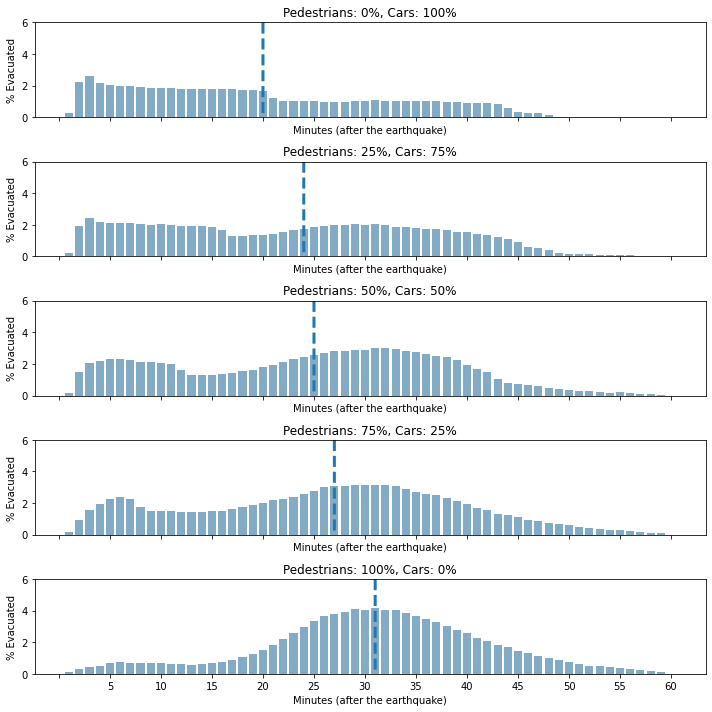

In [46]:
plot_evacuation_times([models[0]], mean=True)

19.0
24.0
27.0
29.0
32.0


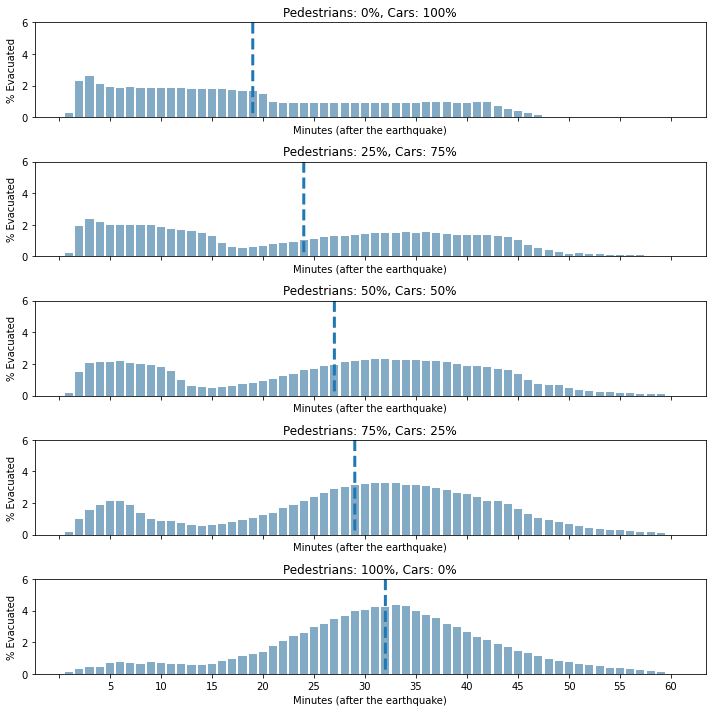

In [63]:
plot_evacuation_times([models[1]], mean=True)

20.0
20.0
24.0
24.0
25.0
26.0
27.0
28.0
31.0
32.0


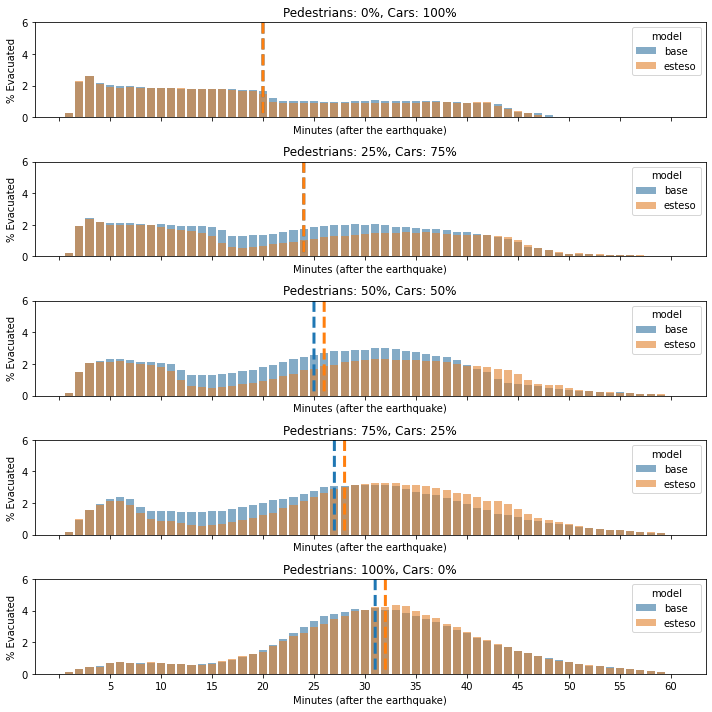

In [47]:
plot_evacuation_times(models, mean=True)

## Average Measures

In [23]:
def average_measures(model, exp):
    avg_data = pd.DataFrame()
    for k in range(1, I + 1):
        e_data = pd.read_csv(f"./data/{model}/evacuated/evacuated-{exp['N_PEDS']}-{exp['N_CARS']}-{k}.csv", skiprows=18)
        c_data = pd.read_csv(f"./data/{model}/casualties/casualties-{exp['N_PEDS']}-{exp['N_CARS']}-{k}.csv", skiprows=18)

        e_data["measure"] = "evacuated"
        c_data["measure"] = "casualties"

        data = pd.concat((e_data, c_data))
        data["i"] = k

        avg_data = pd.concat((data, avg_data))

    e_groups = avg_data[avg_data["measure"] == "evacuated"]
    e_groups = e_groups.groupby([e_groups.index])
    e_tot_avg_data = e_groups[["x", "y", "x.1", "y.1", "x.2", "y.2"]].mean()
        
    c_groups = avg_data[avg_data["measure"] == "casualties"]
    c_groups = c_groups.groupby([c_groups.index])
    c_tot_avg_data = c_groups[["x", "y", "x.1", "y.1", "x.2", "y.2"]].mean()

    e_tot_avg_data["measure"] = "evacuated"
    c_tot_avg_data["measure"] = "casualties"

    tot_avg_data = pd.concat((e_tot_avg_data, c_tot_avg_data))

    tot_avg_data["model"] = model

    filename = f"./data/{model}/measures-{exp['N_PEDS']}-{exp['N_CARS']}-mean.csv"
    tot_avg_data.to_csv(filename)

    return tot_avg_data

In [24]:
for model in models:
    for exp in exps:
        average_measures(model, exp)

In [52]:
def plot_comparisons(models, exps):
    plt.rcParams["font.size"] = 16

    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes = axes.flatten()

    axes[0].set_xlabel("Minutes")
    axes[0].set_ylabel("% Cars")
    axes[0].set_ylim([0, 50])
    axes[0].set_xlim([0, 60])

    axes[1].set_xlabel("Minutes")
    axes[1].set_ylabel("% Pedestrians")
    axes[1].set_ylim([0, 60])
    axes[1].set_xlim([0, 60])

    axes[2].set_xlabel("Minutes")
    axes[2].set_ylabel("% Total")
    axes[2].set_ylim([0, 100])
    axes[2].set_xlim([0, 60])

    models_data = pd.DataFrame()

    for i, model in enumerate(models):   
        avg_data = pd.DataFrame()
    
        for exp in exps:
            data = pd.read_csv(f"./data/{model}/measures-{exp['N_PEDS']}-{exp['N_CARS']}-mean.csv")
            data["exp"] = f"{exp['N_PEDS']}-{exp['N_CARS']}"
            data = data.rename(columns={"Unnamed: 0": "t"})

            avg_data = pd.concat((avg_data, data))
                    
        c_avg_data = avg_data[avg_data["measure"] == "casualties"]
        e_avg_data = avg_data[avg_data["measure"] == "evacuated"]

        c_avg_data = c_avg_data.groupby("t")[['x', 'y', 'x.1', 'y.1', 'x.2', 'y.2']].mean()
        c_avg_data["measure"] = "casualties"

        e_avg_data = e_avg_data.groupby("t")[['x', 'y', 'x.1', 'y.1', 'x.2', 'y.2']].mean()
        e_avg_data["measure"] = "evacuated"

        avg_data = pd.concat((c_avg_data, e_avg_data))
        avg_data["model"] = model.replace("new", "esteso")

        models_data = pd.concat((models_data, avg_data))

    sns.lineplot(models_data, x="x.1", y="y.1", hue="measure", ax=axes[1], style="model")
    sns.lineplot(models_data, x="x.2", y="y.2", hue="measure", ax=axes[0], style="model")
    sns.lineplot(models_data, x="x", y="y", hue="measure", ax=axes[2], style="model")

    print(models_data.groupby(["model", "measure"])["y"].max())

    fig.tight_layout()

model   measure   
base    casualties    12.587443
        evacuated     87.139197
esteso  casualties    20.943581
        evacuated     78.771805
Name: y, dtype: float64


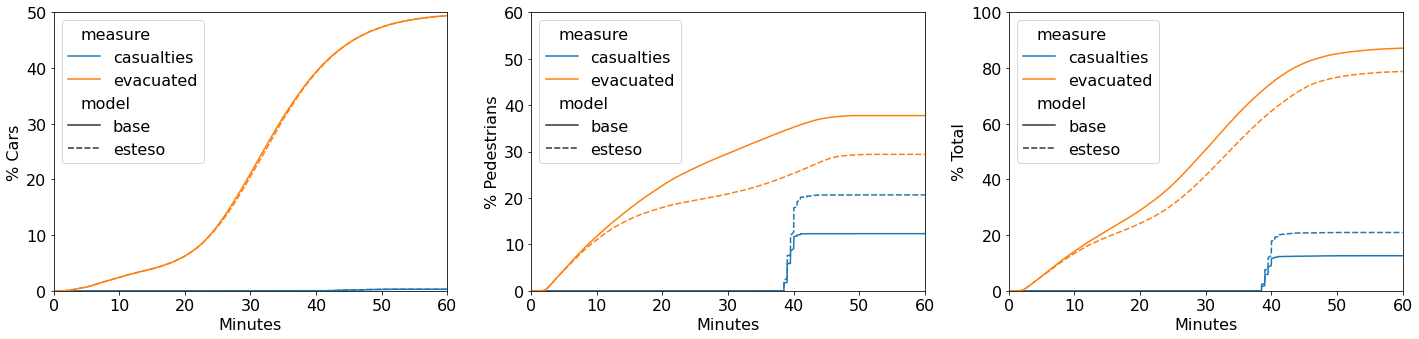

In [53]:
plot_comparisons(models, exps)

# mediare i risultate di base per split diversi
# mediare i risultate di new per split diversi
# mediare i risultate di base+speed per split diversi

# Network Measures

## Average Values

In [27]:
import re

LIST_RE = re.compile(r"\[(\d+) (\d+(?:\.\d+)?)\]")


def parse_list(netlogo_list):
    x = LIST_RE.findall(netlogo_list)
    x = dict(map(list, x))

    return x


def to_netlogo(value):
    return "[" + " ".join([f"[{k} {v}]" for (k, v) in value.items()]) + "]" 


def average_netlogo_lists(lists):
    lists = list(map(parse_list, lists))
    
    # append values of the same intersection
    new_dict = {}
    for n in lists:
        for (key, value) in n.items():
            if key not in new_dict:
                new_dict[key] = []

            new_dict[key].append(float(value))

    # pad values if missing and replace values with the mean
    for (key, value) in new_dict.items():
        new_dict[key] = np.mean((np.pad(value, (0, I - len(value)))))

    return to_netlogo(new_dict)

In [28]:
def average_intersections(model, exp):
    prefix = f"./data/{model}/intersections/intersections-{exp['N_PEDS']}-{exp['N_CARS']}"

    ints_df = None
    for i in range (1, I + 1):
        data = pd.read_csv(f"{prefix}-{i}.csv")
        data = data.set_index(["who", "minute"])

        ints_df = pd.concat((ints_df, data))

    grouped_ints_df = ints_df.groupby(level=[0, 1])

    # average values 

    avg_ints_df = pd.DataFrame(grouped_ints_df["car-delay"].mean())

    for col in set(ints_df.columns) - set(["car-delay"]):
        avg_list = grouped_ints_df[col].apply(lambda x: average_netlogo_lists(x))
        avg_ints_df = avg_ints_df.join(avg_list)

    avg_ints_df.to_csv(f"{prefix}-mean.csv")

In [29]:
def average_intersections_evtimes(model, exp):
    prefix = f"./data/{model}/intersections/intersections-evtimes-{exp['N_PEDS']}-{exp['N_CARS']}"

    ints_evtime_df = None
    for i in range (1, I + 1):
        data = pd.read_csv(f"{prefix}-{i}.csv")
        data = data.set_index(["who"])
        data.replace(0, np.nan, inplace=True)

        ints_evtime_df = pd.concat((ints_evtime_df, data))

    ints_evtime_df = ints_evtime_df.groupby(level=[0]).mean()
    ints_evtime_df.replace(np.nan, 0, inplace=True)
    ints_evtime_df.to_csv(f"{prefix}-mean.csv")

In [30]:
def average_roads(model, exp):
    prefix = f"./data/{model}/roads/roads-{exp['N_PEDS']}-{exp['N_CARS']}"

    roads_df = None
    for i in range (1, I + 1):
        data = pd.read_csv(f"{prefix}-{i}.csv")
        data = data.set_index(["end1", "end2", "minute"])

        roads_df = pd.concat((roads_df, data))

    roads_df = roads_df.groupby(level=[0, 1, 2]).mean()

    roads_df.to_csv(f"{prefix}-mean.csv")

In [31]:
for model in models:
    for exp in exps:
        average_intersections(model, exp)
        average_intersections_evtimes(model, exp)
        average_roads(model, exp)

## Roads

### Casualties

In [32]:
def plot_critical_links(model, exps):
    fig, ax = plt.subplots(len(exps) + 1, 1, figsize=(8, 12), sharex=True, sharey=True)

    avg_casualties = []
    for i in range(len(exps) + 1):
        if i < len(exps):
            exp = exps[i]
            data = pd.read_csv(f"./data/{model}/roads/roads-{exp['N_PEDS']}-{exp['N_CARS']}-mean.csv")

            ints1 = set(data["end1"]) 
            ints2 = set(data["end2"])

            data = data.set_index(["end1", "end2"])
            data = data.loc[data["minute"] == 60]

            for x in ints1:
                for y in ints2:   
                    if (x, y) in data.index and (y, x) in data.index:
                        data.loc[(x, y)] = data.loc[(x, y)] + data.loc[(y, x)]
                        data.drop((y, x), inplace=True)

            data = data.reset_index()

            casualties = data["casualties"]
            avg_casualties.append(casualties)

            ax[i].set_title(f"Pedestrians: {exp['N_PEDS']}%, Cars: {exp['N_CARS']}%")
        else:
            casualties = np.mean(avg_casualties, axis=0)
            ax[i].set_title(f"Mean")

        ax[i].set_ylabel("% casualties")
        ax[i].set_ylim([0, 10])
        ax[i].set_xlabel("links")
        sns.lineplot(casualties / np.sum(casualties) * 100, ax=ax[i])

    fig.tight_layout()

    critical_links = data[casualties / np.sum(casualties) * 100 >= 5][["end1", "end2"]]
    critical_links["casualties"] = casualties[casualties / np.sum(casualties) * 100 >= 5]
    critical_links["casualties"] = np.round(critical_links["casualties"] / np.sum(casualties) * 100)
    critical_links["casualties"] = critical_links["casualties"].apply(lambda x : f"{x:.1f}%")
    
    return fig, critical_links

,end1,end2,casualties


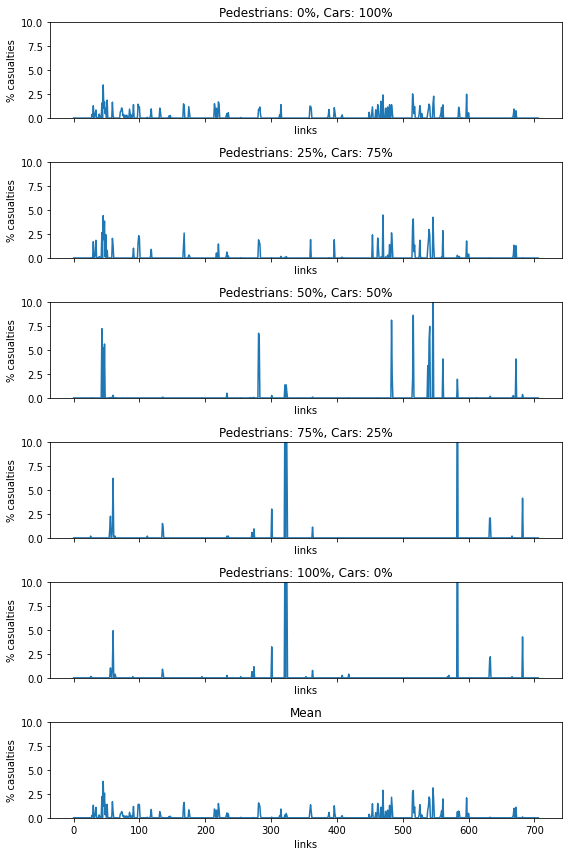

In [33]:
fig, critical_links = plot_critical_links("base", exps)
critical_links

,end1,end2,casualties


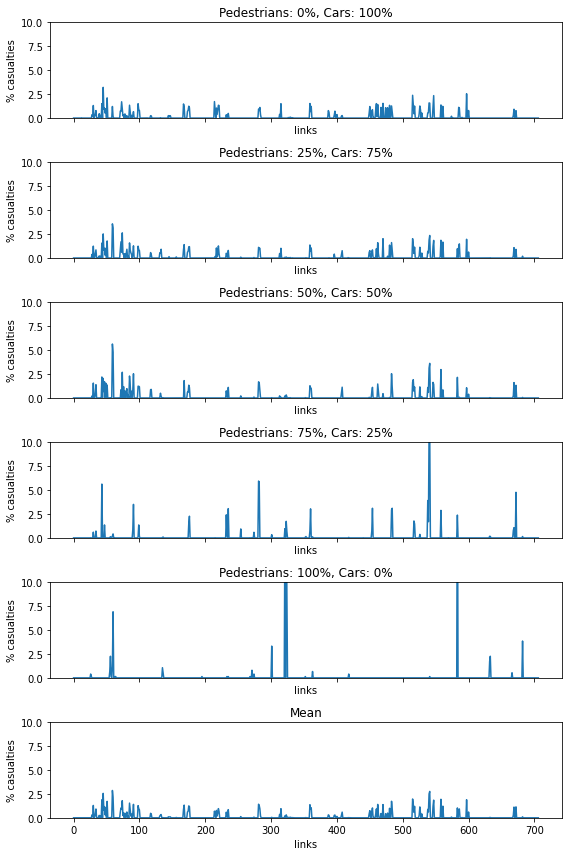

In [34]:
fig, critical_links = plot_critical_links("new", exps)
critical_links

## Intersections

In [13]:
two_way_df = pd.read_csv("../road_network/two-way.csv", header=None, names=["crossroads", "stop1", "stop2"])
two_way_df["stops"] = two_way_df[["stop1", "stop2"]].agg(list, axis=1)

two_way_ints = set(two_way_df["crossroads"])

two_way_df = two_way_df.set_index("crossroads")
two_way_df

,stop1,stop2,stops
crossroads,,,
182,43,183,"[43, 183]"
267,480,40,"[480, 40]"
281,481,39,"[481, 39]"
75,74,76,"[74, 76]"
269,79,434,"[79, 434]"
...,...,...,...
336,293,493,"[293, 493]"
293,335,336,"[335, 336]"
335,293,334,"[293, 334]"


### Car Delay

In [14]:
def plot_intersection_measure(model, exps):
    fig, ax = plt.subplots(len(exps) + 1, 1, figsize=(20, 12), sharex=True, sharey=True)

    exp_car_delay = {}

    avg_data = pd.DataFrame()
    for i, exp in enumerate(exps):
        data = pd.read_csv(f"./data/{model}/intersections/intersections-{exp['N_PEDS']}-{exp['N_CARS']}-mean.csv")

        data = data.set_index(["who"])
        data = data.loc[data["minute"] == 60]
        data.sort_index()
        data = data.reset_index()

        data["two-way?"] = data["who"].isin(two_way_ints).transform(lambda x: "TWSC" if x else "AWSC")

        exp_car_delay[exp['N_CARS']] = data
        avg_data = pd.concat((avg_data, data))

        ax[i].set_title(f"Pedestrians: {exp['N_PEDS']}%, Cars: {exp['N_CARS']}%")    
        sns.barplot(data, x="who", y="car-delay", hue="two-way?", order=data.sort_values(by="two-way?")["who"].values, ax=ax[i])    
        ax[i].set_ylabel("average delay (seconds)")
        ax[i].set_xlabel("intersections")
        ax[i].tick_params(axis='x', rotation=90)

    two_ways = data[["who", "two-way?"]].drop_duplicates()["two-way?"]

    avg_data = avg_data[["who", "car-delay"]].groupby("who").mean()
    avg_data = avg_data.reset_index()
    avg_data["two-way?"] = two_ways

    ax[i + 1].set_title(f"Mean")
    sns.barplot(avg_data, x="who", y="car-delay", hue="two-way?", order=avg_data.sort_values(by="two-way?")["who"].values, ax=ax[i + 1])    
    ax[i + 1].set_ylabel("average delay (seconds)")
    ax[i + 1].set_xlabel("intersections")
    ax[i + 1].tick_params(axis='x', rotation=90)

    fig.tight_layout()

    return avg_data, exp_car_delay

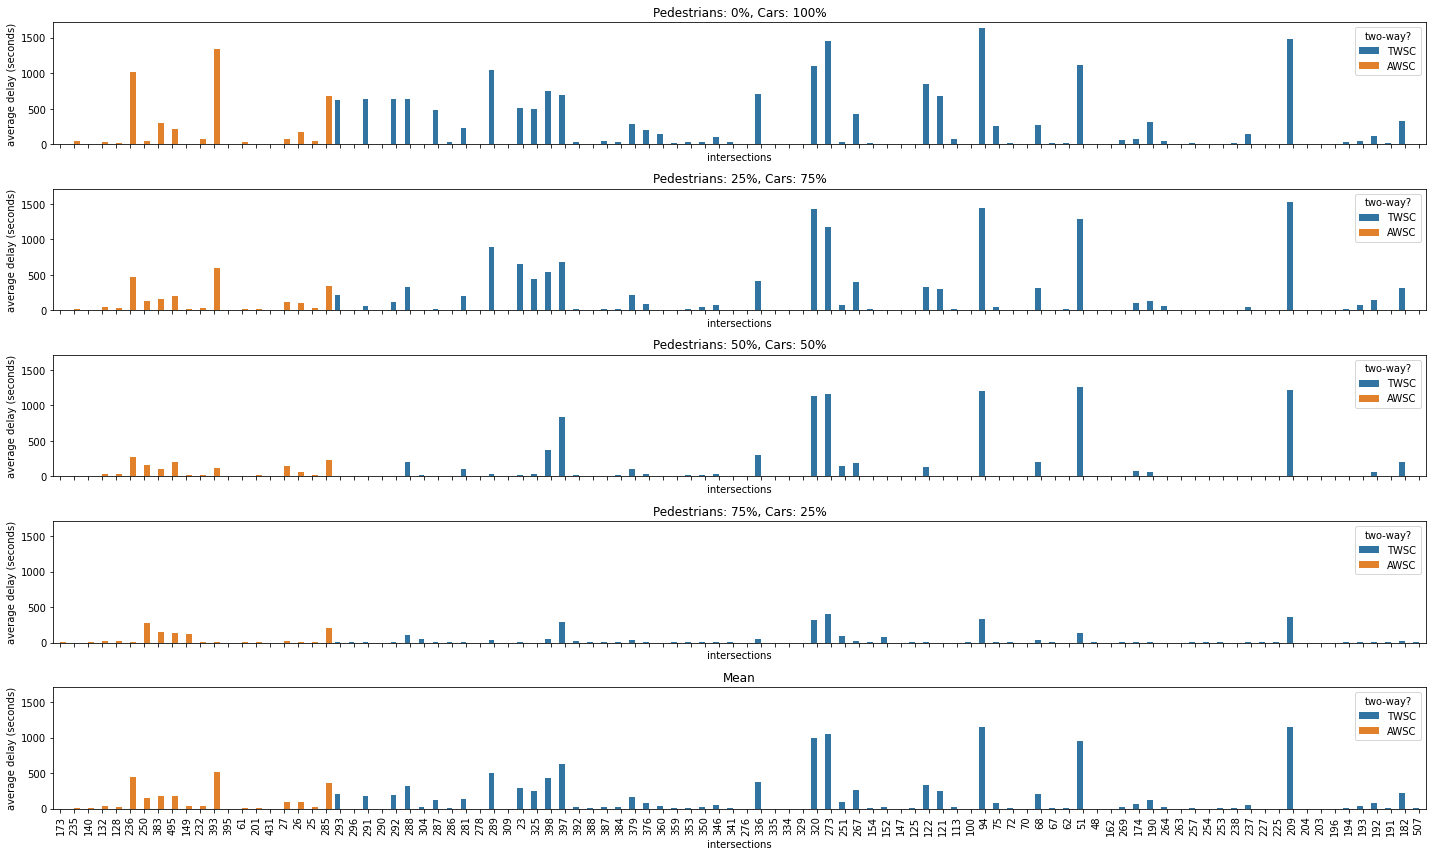

In [37]:
avg_car_delay, car_delay_per_exp = plot_intersection_measure(model, exps[:4])

In [15]:
print("Average:")
print(avg_car_delay.groupby("two-way?")["car-delay"].mean())
print(f"\nAverage car-delay: {avg_car_delay['car-delay'].mean()}")


print("\n\n75% - 25%:")
print(car_delay_per_exp[25].groupby("two-way?")["car-delay"].mean())
print(f"\nAverage car-delay: {car_delay_per_exp[25]['car-delay'].mean()}")

Average:


NameError: name 'avg_car_delay' is not defined

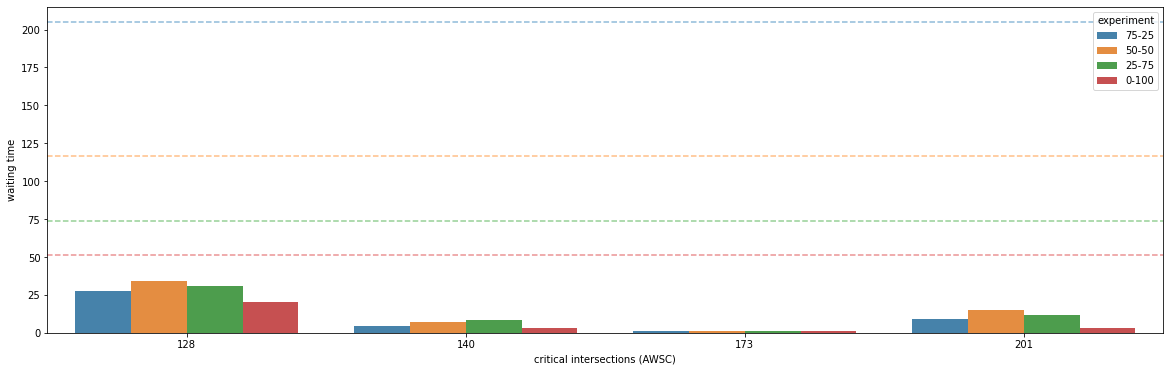

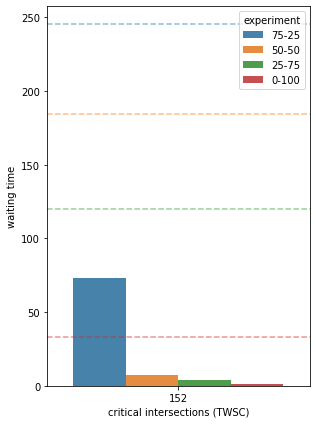

In [16]:
total_data = pd.DataFrame()

awsc_means = []
twsc_means = []

fig = plt.figure(figsize=(20, 6))

for i, exp in enumerate(exps[:4]):
    data = pd.read_csv(f"./data/new/intersections/intersections-{exp['N_PEDS']}-{exp['N_CARS']}-mean.csv")
    data = data.loc[data["minute"] == 60]
    
    data["type"] = data["who"].isin(two_way_ints).transform(lambda x: "TWSC" if x else "AWSC")

    awsc_means.append({"exp": f"{exp['N_PEDS']}-{exp['N_CARS']}", "mean": data.loc[data["type"] == "AWSC"]["car-delay"].mean()})
    twsc_means.append({"exp": f"{exp['N_PEDS']}-{exp['N_CARS']}", "mean": data.loc[data["type"] == "TWSC"]["car-delay"].mean()})

    new_data = data.loc[data["who"].isin([128, 140, 152, 173, 188, 201])].copy()
    new_data["experiment"] = f"{exp['N_PEDS']}-{exp['N_CARS']}"

    total_data = pd.concat((new_data, total_data))


awsc_means = pd.DataFrame.from_dict(awsc_means)
twsc_means = pd.DataFrame.from_dict(twsc_means)


ax = sns.barplot(total_data.loc[total_data["type"] == "AWSC"], x="who", y="car-delay", hue="experiment",alpha=0.9)
ax.set_xlabel("critical intersections (AWSC)")
ax.set_ylabel("waiting time")

palette = sns.color_palette()
for k, row in awsc_means.iterrows():
    ax.axhline(row["mean"], label=row["exp"], alpha=0.5, linestyle="--", color=palette[k])

    # sns.barplot(new_data.loc[new_data["type"] == "TWSC"], x="who", y="car-delay", ax=ax[i, 1], color="blue")
    # ax[i,1].axhline(data.loc[data["type"] == "TWSC"]["car-delay"].mean(), alpha=0.8, linestyle="--", color='black')
    # ax[i,1].axhline(data.loc[data["type"] == "TWSC"]["car-delay"].max(), alpha=0.8, linestyle="--", color='black')

    #ax[i, 1].set_ylim([0, 500])
fig = plt.figure(figsize=(4.5, 6))

ax = sns.barplot(total_data.loc[total_data["type"] == "TWSC"], x="who", y="car-delay", hue="experiment", alpha=0.9)
ax.set_xlabel("critical intersections (TWSC)")
ax.set_ylabel("waiting time")
for k, row in twsc_means.iterrows():
    ax.axhline(row["mean"], label=row["exp"], alpha=0.5, linestyle="--", color=palette[k])
fig.tight_layout()

### Flow

In [17]:
def plot_intersection_flow(model, exp, mode="p"):
    fig, axes = plt.subplots(2, 1, figsize=(30, 8), sharey=True)

    exp_car_delay = {}

    avg_data = pd.DataFrame()

    data = pd.read_csv(f"./data/{model}/intersections/intersections-{exp['N_PEDS']}-{exp['N_CARS']}-mean.csv")

    data = data.set_index(["who"])
    data = data.loc[data["minute"] == 60]
    data.sort_index()
    data = data.reset_index()

    data["two-way?"] = data["who"].isin(two_way_ints).transform(lambda x: "TWSC" if x else "AWSC")

    data[f"{mode}-in-flow"] = data[f"{mode}-in-flow"].apply(lambda x:  np.sum(list(map(float, list(parse_list(x).values())))))
    data[f"{mode}-out-flow"] = data[f"{mode}-out-flow"].apply(lambda x:  np.sum(list(map(float, list(parse_list(x).values())))))

    data_in = data[["who", f"{mode}-in-flow", "two-way?"]].copy()
    data_out = data[["who", f"{mode}-out-flow", "two-way?"]].copy()

    data_in["direction"] = "in"
    data_out["direction"] = "out"

    data_in = data_in.rename(columns={ f"{mode}-in-flow": "flow" })        
    data_out = data_out.rename(columns={ f"{mode}-out-flow": "flow" })
    
    data = pd.concat((data_in, data_out))

    exp_car_delay[exp['N_CARS']] = data
    avg_data = pd.concat((avg_data, data))


    data_2 = data[data["two-way?"] == "TWSC"][["who", "flow", "direction"]]
    data_4 = data[data["two-way?"] == "AWSC"][["who", "flow", "direction"]]

    
    ax = sns.barplot(data_2, x="who", y="flow", hue="direction", order=data_2.sort_values("flow", ascending=False)["who"].values, dodge=True, ax=axes[0])  
    ax.set_title(f"Pedestrians: {exp['N_PEDS']}%, Cars: {exp['N_CARS']}%") 
    
    ax.set_ylabel("average delay (seconds)")
    ax.set_xlabel("intersections")
    ax.tick_params(axis='x', rotation=90)

    ax = sns.barplot(data_4, x="who", y="flow", hue="direction", order=data_4.sort_values("flow", ascending=False)["who"].values, dodge=True, ax=axes[1])  
    ax.set_ylabel("average delay (seconds)")
    ax.set_xlabel("intersections")
    ax.tick_params(axis='x', rotation=90)

    # two_ways = data[["who", "two-way?"]].drop_duplicates()["two-way?"]

    # avg_data = avg_data[["who", "p-in-flow"]].groupby("who").mean()
    # avg_data = avg_data.reset_index()
    # avg_data["two-way?"] = two_ways

    # ax[i + 1].set_title(f"Mean")
    # sns.barplot(avg_data, x="who", y="p-in-flow", hue="two-way?", order=avg_data.sort_values(by="two-way?")["who"].values, ax=ax[i + 1])    
    # ax[i + 1, 0].set_ylabel("average delay (seconds)")
    # ax[i + 1, 0].set_xlabel("intersections")
    # ax[i + 1, 0].tick_params(axis='x', rotation=90)

    fig.tight_layout()

    return avg_data, exp_car_delay

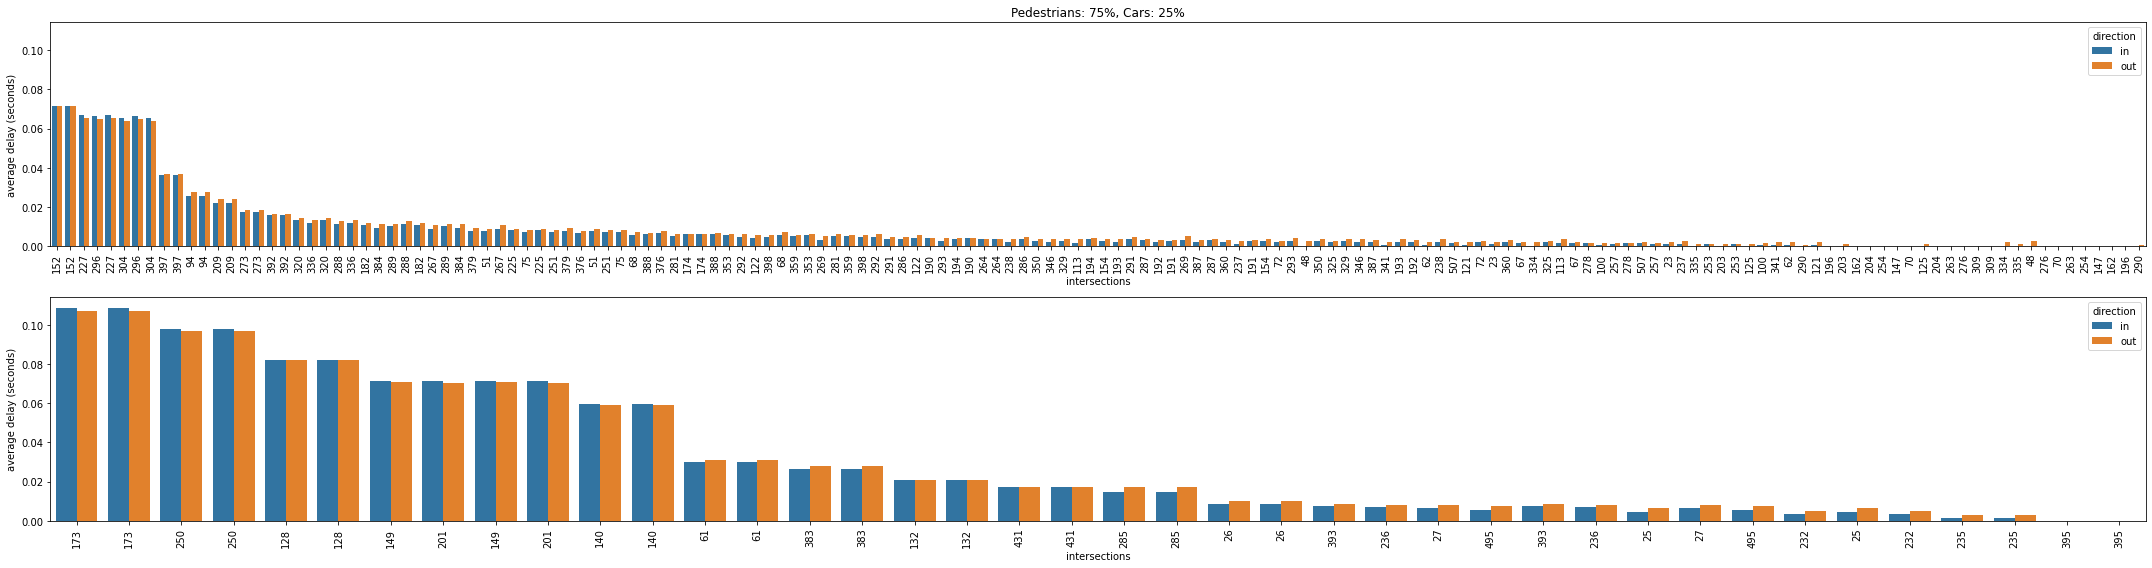

In [41]:
avg_data, exp_car_delay = plot_intersection_flow("new", exps[3], "p")

### Prova

In [18]:
def plot_flow(model, exp, ax, mode = "car", title=True):
    exp_car_delay = {}

    avg_data = pd.DataFrame()

    data = pd.read_csv(f"./data/{model}/intersections/intersections-{exp['N_PEDS']}-{exp['N_CARS']}-mean.csv")

    data = data.set_index(["who"])
    data = data.loc[data["minute"] == 60]
    data.sort_index()
    data = data.reset_index()

    data["type"] = data["who"].isin(two_way_ints).transform(lambda x: "TWSC" if x else "AWSC")

    data[f"{mode}-in-flow"] = data[f"{mode}-in-flow"].apply(lambda x:  np.sum(list(map(float, list(parse_list(x).values())))) * (3600 if mode == "car" else 60))
    data[f"{mode}-out-flow"] = data[f"{mode}-out-flow"].apply(lambda x:  np.sum(list(map(float, list(parse_list(x).values())))) * (3600 if mode == "car" else 60))

    data_in = data[["who", f"{mode}-in-flow", "type"]].copy()
    data_out = data[["who", f"{mode}-out-flow", "type"]].copy()

    #critical_ints = [173, 188, 250, 373, 389, 519] if model == "base" else [128, 140, 152, 173, 188, 201]

    #data["critical"] =  data["who"].isin(critical_ints) # abs(data[f"{mode}-in-flow"] -  data[f"{mode}-out-flow"]) >= (3 * np.sqrt(2))
    
    v_max = 2000 if mode == "car" else 12
    line_x = [-0.5, v_max + 0.5]
    line_y = [-0.5, v_max + 0.5]
    
    sns.lineplot(x=line_x, y=line_y, linestyle="--", color="black", alpha=0.2, ax=ax)
    #ax = sns.lineplot(x=line_x, y=np.array(line_y) - 3, linestyle="--", color="black", alpha=0.2)

    # data = data.loc[(data[f"{mode}-out-flow"] != 0) | (data[f"{mode}-in-flow"] != 0)] 

    if "critical" not in set(data.columns) or (data['critical'] == data['critical'][0]).all(): 
        sns.scatterplot(data, x=f"{mode}-in-flow", y=f"{mode}-out-flow", hue="type", sizes=(50), alpha=0.8, ax=ax, legend=True)
    else:
        sns.scatterplot(data, x=f"{mode}-in-flow", y=f"{mode}-out-flow", hue="type", style="critical", size="critical", sizes=(150, 50), alpha=0.8, ax=ax, legend=False)

    ax.set_xlabel(f"in flow ({'veh' if mode == 'car' else 'ped'} / {'h' if mode == 'car' else 'min'})")
    ax.set_ylabel(f"out flow ({'veh' if mode == 'car' else 'ped'} / {'h' if mode == 'car' else 'min'})")

    ax.set_xlim(line_x)
    ax.set_ylim(line_y)

    if title:
        ax.set_title(f"Pedestrians: {exp['N_PEDS']}% - Cars: {exp['N_CARS']}%")
    #print(data.loc[data["critical"]][["who", "car-in-flow", "car-out-flow" ]])

def plot_flows(models, exps, mode="p", title=True):
    fig, axes = plt.subplots(len(models), len(exps), figsize=(16, len(models) * 4), sharex=True, sharey=True)
    
    for i, model in enumerate(models):
        for j, exp in enumerate(exps):
            if len(models) > 1:
                ax = axes[i, j]
            else:
                ax = axes[j]
            plot_flow(model, exp, ax, mode=mode, title=title)

    fig.tight_layout()

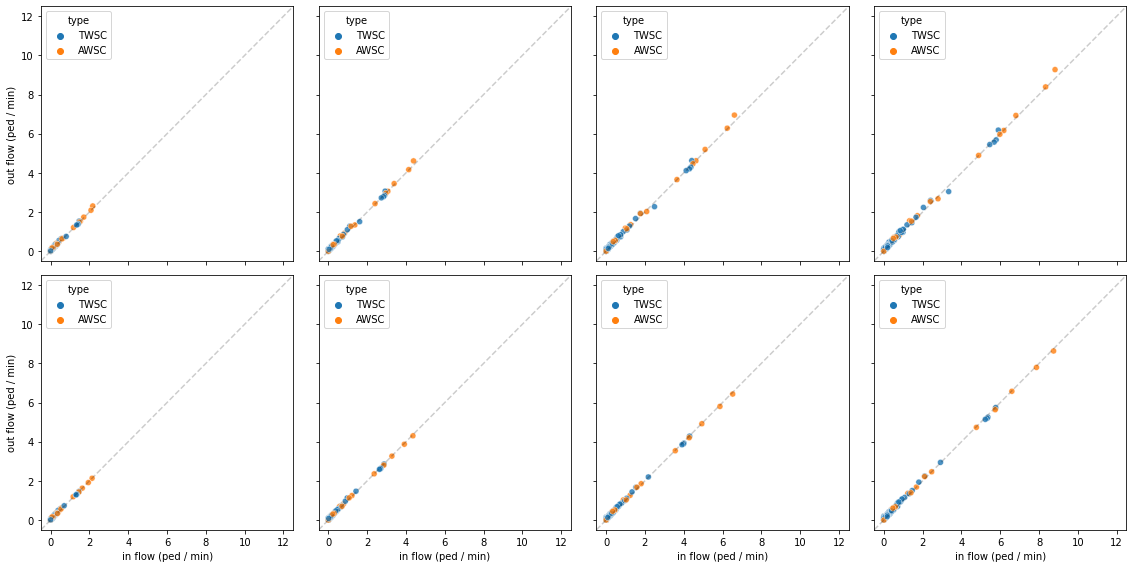

In [43]:
plot_flows(models, exps[1:], mode="p", title=False)

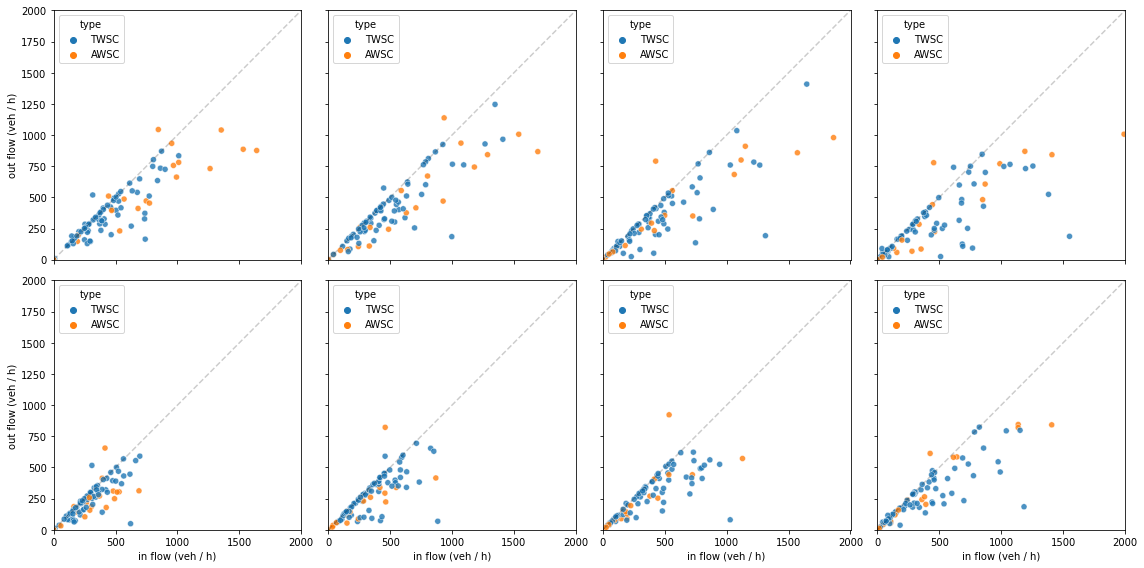

In [44]:
plot_flows(models, exps[:4][::-1], mode="car", title=False)

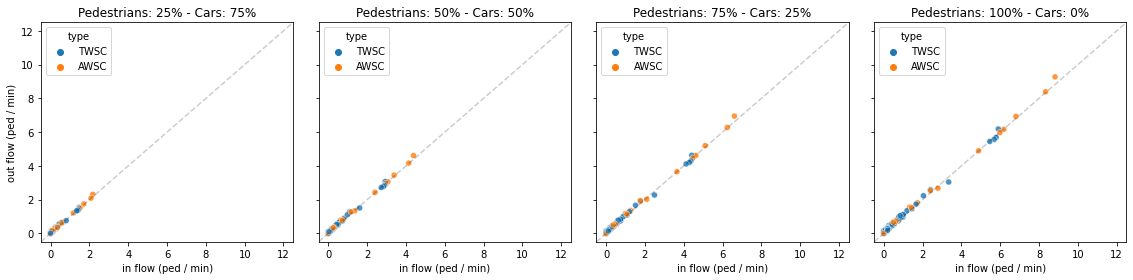

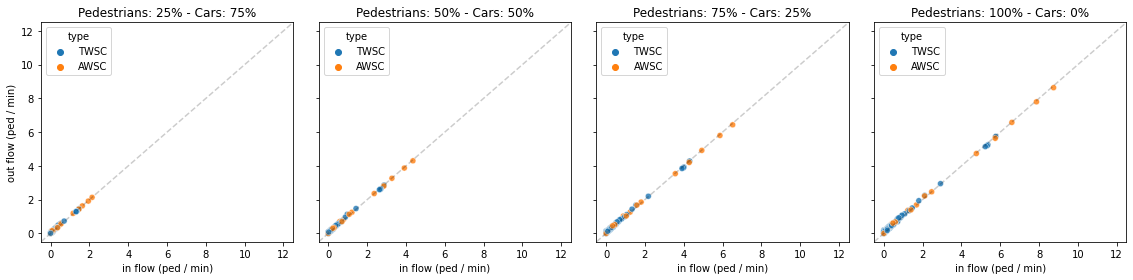

In [45]:
plot_flows(["base"], exps[1:], mode="p")
plot_flows(["new"], exps[1:], mode="p")

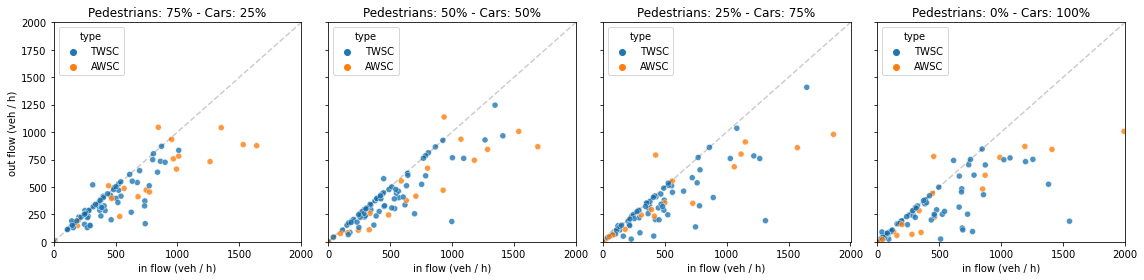

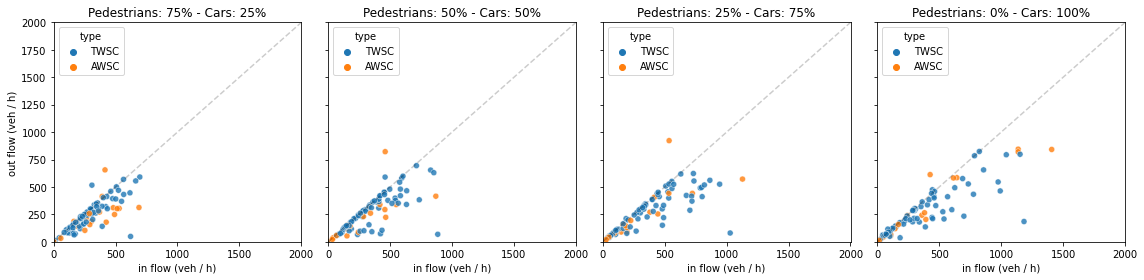

In [46]:
plot_flows([models[0]], exps[:4][::-1], mode="car")
plot_flows([models[1]], exps[:4][::-1], mode="car")

### Two Way Flow

In [19]:
def plot_twoway_flow(model, exp, mode = "car"):
    fig = plt.figure(figsize=(10, 10))

    exp_car_delay = {}

    avg_data = pd.DataFrame()

    data = pd.read_csv(f"./data/{model}/intersections/intersections-{exp['N_PEDS']}-{exp['N_CARS']}-mean.csv")

    data = data.set_index(["who"])
    data = data.loc[data["minute"] == 60]
    data.sort_index()
    data = data.reset_index()

    # keep twoways
    data = data.loc[data["who"].isin(two_way_ints)]

    principal_in_flows = [] 
    secondary_in_flows = [] 
    
    principal_out_flows = [] 
    secondary_out_flows = [] 

    for i, item in data.iterrows():
        for flow_dir in ["in", "out"]:
            flow_dict = parse_list(item[f"{mode}-{flow_dir}-flow"])

            stops = two_way_df.loc[item["who"]]["stops"]

            principal_ints = [k for k in flow_dict if int(k) not in stops]
            secondary_ints = [k for k in flow_dict if int(k) in stops]

            principal_flow = np.sum([float(flow_dict[k]) * 60 for k in principal_ints])
            secondary_flow = np.sum([float(flow_dict[k]) * 60 for k in secondary_ints])

            if flow_dir == "in":
                principal_in_flows.append(principal_flow)
                secondary_in_flows.append(secondary_flow)
            else:
                principal_out_flows.append(principal_flow)
                secondary_out_flows.append(secondary_flow)

    principal = data[["who"]].copy()
    principal["in-flow"] = principal_in_flows
    principal["out-flow"] = principal_out_flows
    principal["road"] = "principal"

    secondary = data[["who"]].copy()
    secondary["in-flow"] = secondary_in_flows
    secondary["out-flow"] = secondary_out_flows
    secondary["road"] = "secondary"

    data = pd.concat((principal, secondary))

    sns.lineplot(x=[0, data["in-flow"].max()], y=[0, data["out-flow"].max()], linestyle="--", color="black", alpha=0.2)
    ax = sns.scatterplot(data, x="in-flow", y="out-flow", hue="road", alpha=0.8)
    ax.set_xlabel("in flow (car / min)")
    ax.set_ylabel("out flow (car / min)")

    print(data[data["who"] == 23])

In [20]:
plot_twoway_flow(model = "new", exp=exps[3])

NameError: name 'parse_list' is not defined

<Figure size 720x720 with 0 Axes>

       evacuation time mode
model                      
base          0.550502  car
new           0.544690  car
       evacuation time
model                 
base         12.234624
new          16.198552
       evacuation time mode
model                      
base         47.569571  car
new          48.115553  car


<AxesSubplot:xlabel='model', ylabel='evacuation time'>

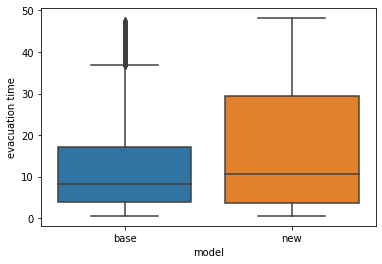

In [30]:
model = "new"
rows = []
box_rows = []

for model in models:
    for i, exp in enumerate(exps):
        data = pd.read_csv(f"./data/{model}/intersections/intersections-evtimes-{exp['N_PEDS']}-{exp['N_CARS']}-mean.csv")
        data = data.set_index(["who"])
        data.replace(0, np.nan, inplace=True)

        for j, row in data.iterrows():
            box_rows.append([(row["mean car evacuation time"] - 0) / 60, "car", f"{exp['N_PEDS']}% pedoni - {exp['N_CARS']}% auto", model])
            box_rows.append([(row["mean ped evacuation time"] - 0) / 60, "ped", f"{exp['N_PEDS']}% pedoni - {exp['N_CARS']}% auto", model])

            box_rows.append([(row["mean car evacuation time"] - 0) / 60, "car", "mean", model])
            box_rows.append([(row["mean ped evacuation time"] - 0) / 60, "ped", "mean", model])

box_df = pd.DataFrame(box_rows, columns=["evacuation time", "mode", "split", "model"])

box_df_2 = box_df.copy().drop(columns=["split"])

mode = "car" # ped

print(box_df_2[(box_df["mode"] == mode)].groupby('model').min())
print(box_df_2[(box_df["mode"] == mode)].groupby('model').mean())
print(box_df_2[(box_df["mode"] == mode)].groupby('model').max())

sns.boxplot(box_df_2[(box_df["mode"] == mode)], y="evacuation time",  x="model")

       evacuation time mode                  split   model modello
0            18.577876  car  0% pedoni - 100% auto    base    base
1                  NaN  ped  0% pedoni - 100% auto    base    base
2            18.577876  car                   mean    base    base
3                  NaN  ped                   mean    base    base
4            13.720749  car  0% pedoni - 100% auto    base    base
...                ...  ...                    ...     ...     ...
22275        18.981056  ped                   mean  esteso  esteso
22276              NaN  car  100% pedoni - 0% auto  esteso  esteso
22277        19.512405  ped  100% pedoni - 0% auto  esteso  esteso
22278              NaN  car                   mean  esteso  esteso
22279        19.512405  ped                   mean  esteso  esteso

[22280 rows x 5 columns]


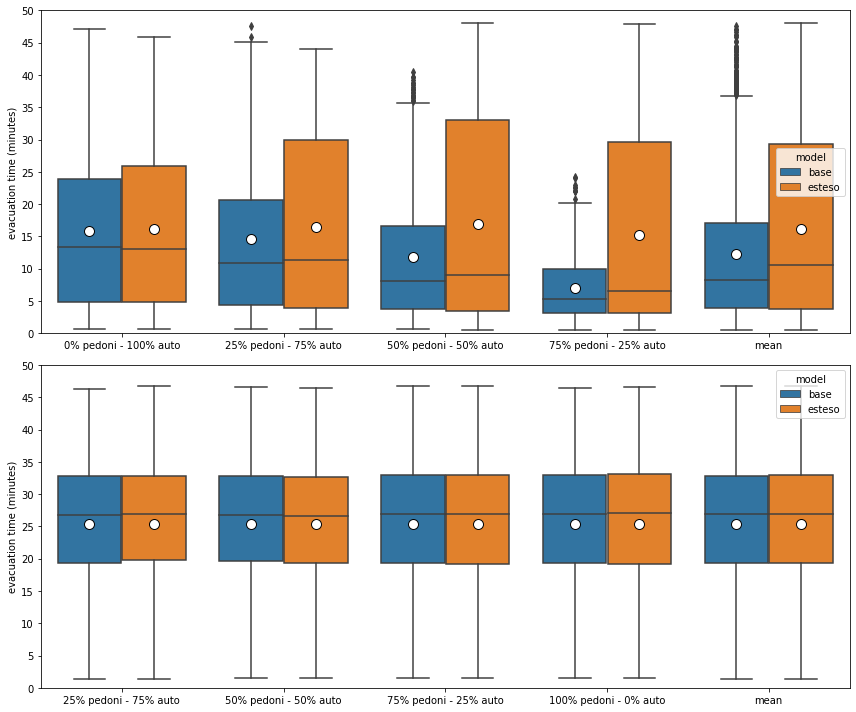

In [44]:
print(box_df)
box_df["model"]  = box_df["model"].str.replace("new", "esteso")


car_df = box_df[(box_df["mode"] == "car") & (box_df["split"] != "100% pedoni - 0% auto")]
ped_df = box_df[(box_df["mode"] == "ped") & (box_df["split"] != "0% pedoni - 100% auto")]

meanprops = {
    "marker": "o",
    "markerfacecolor": "white",
    "markeredgecolor": "black",
    "markersize": "10",
}

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharey=True)
sns.boxplot(
    car_df,
    x="split",
    y="evacuation time",
    hue="model",
    order=['0% pedoni - 100% auto', '25% pedoni - 75% auto', '50% pedoni - 50% auto', '75% pedoni - 25% auto', 'mean'],
    showmeans=True,
    meanprops=meanprops,
    ax=axes[0],
)
sns.boxplot(
    ped_df,
    x="split",
    y="evacuation time",
    hue="model",
    order=['25% pedoni - 75% auto', '50% pedoni - 50% auto', '75% pedoni - 25% auto', '100% pedoni - 0% auto', 'mean'],
    showmeans=True,
    meanprops=meanprops,
    ax=axes[1],
)

axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[0].set_ylabel("evacuation time (minutes)")
axes[1].set_ylabel("evacuation time (minutes)")

axes[0].set_ylim([0, 50])
axes[0].set_yticks(np.arange(0, 51, 5))

fig.tight_layout()


In [51]:
for model in models:
    avg_data = pd.DataFrame()
    for i, exp in enumerate(exps):
        data = pd.read_csv(f"./data/{model}/intersections/intersections-evtimes-{exp['N_PEDS']}-{exp['N_CARS']}-mean.csv")
        data[["mean ped evacuation time", "mean car evacuation time"]] = data[["mean ped evacuation time", "mean car evacuation time"]].replace(0, np.nan)
        data["split"] = i
        avg_data = pd.concat((avg_data, data))

    avg_data = avg_data.groupby("who")[["mean car evacuation time", "mean ped evacuation time"]].mean().replace(np.nan, 0)
    avg_data.to_csv(f"./data/{model}/evtimes-mean.csv")

### Intersection Casualties

In [52]:
ints_dists = pd.read_csv("../road_network/ints_distances.csv")
ints_dists

,who,distance
0,182,95.324711
1,353,90.728312
2,296,135.265870
3,309,113.542466
4,495,99.467201
...,...,...
93,507,106.250209
94,286,86.585204
95,273,100.882380
96,395,105.950331


In [53]:
def plot_critical_links(model, exps, mode="car"):
    fig, ax = plt.subplots(len(exps) + 1, 1, figsize=(8, 12), sharex=True, sharey=True)
    
    total = 0
    avg_casualties = pd.DataFrame()
    for i in range(len(exps) + 1):
        if i < len(exps):
            exp = exps[i]
            data = pd.read_csv(f"./data/{model}/roads/roads-{exp['N_PEDS']}-{exp['N_CARS']}-mean.csv")

            # data = data[data["end2"].isin(ints_dists["who"])] # keep intersections with more than 3 ways

            data = data.set_index(["end1", "end2"])
            data = data.loc[data["minute"] == 60]

            exp_total = data["casualties"].sum()
            total = total + exp_total
            
            data = data.groupby("end2")["casualties"].sum()
            data = data.reset_index()

            casualties = data[["end2", "casualties"]]
            avg_casualties = pd.concat((avg_casualties, casualties.copy()))

            casualties["casualties"] = casualties["casualties"] / exp_total * 100

            ax[i].set_title(f"Pedestrians: {exp['N_PEDS']}%, Cars: {exp['N_CARS']}%")
        else:
            casualties = avg_casualties.groupby("end2").sum().reset_index()
            casualties["casualties"] = casualties["casualties"] / total * 100
            ax[i].set_title(f"Mean")

        #casualties["type"] = casualties["end2"].isin(two_way_ints).transform(lambda x: "TWSC" if x else "AWSC")
        casualties = casualties.join(ints_dists.set_index("who"), on="end2", how="inner")
        order = casualties.sort_values(by="distance")["end2"]

        sns.barplot(casualties, x="end2", y="casualties", order=order, ax=ax[i], color=sns.color_palette()[0])

        ax[i].set_ylabel("% casualties")
        ax[i].set_ylim([0, 10])
        ax[i].set_xlabel("")
        ax[i].set_xticks([])

    ax[i].set_xlabel("intersections")

    fig.tight_layout()

    casualties.to_csv(f"./data/critical_ints_{model}.csv")

    critical_ints = casualties.loc[casualties["casualties"] >= 5.0].copy()
    critical_ints["casualties"] = critical_ints["casualties"].apply(lambda x : f"{x:.1f}%")
    print(critical_ints)
    print(total)

Empty DataFrame
Columns: [end2, casualties, distance]
Index: []
2833.4333333333334
Empty DataFrame
Columns: [end2, casualties, distance]
Index: []
4714.4


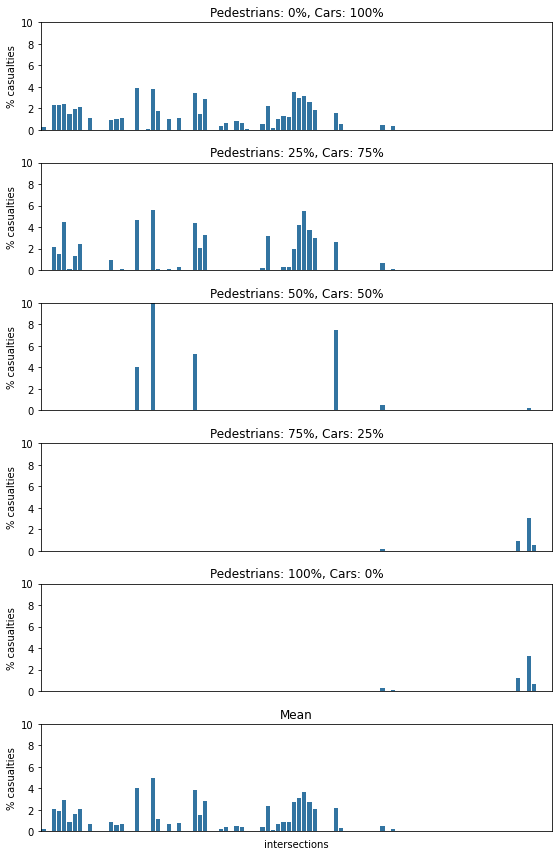

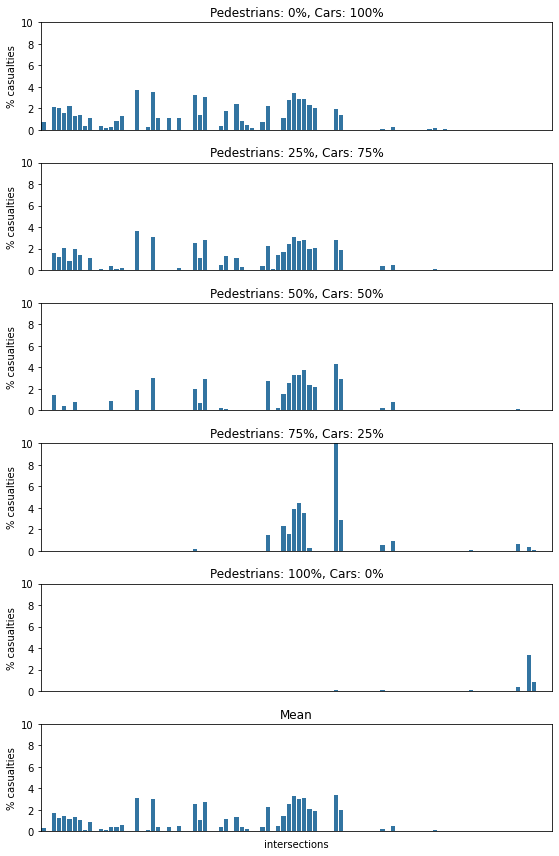

In [54]:
plot_critical_links("base", exps)
plot_critical_links("new", exps)

## Image

In [70]:
from matplotlib.colors import hsv_to_rgb, to_rgba, ListedColormap

def get_colormap(minColor, maxColor, minValue, maxValue, values=128, pad=0):
    colors = [to_rgba(hsv_to_rgb((x / 360, 1, 1))) for x in np.linspace(maxColor, minColor, values)]
    
    if pad != 0:
        colors.extend([to_rgba(hsv_to_rgb((x / 360, 1, 1))) for x in ([maxColor] * pad)])
    cmap = ListedColormap(colors, name='custom')

    norm = plt.Normalize(minValue, maxValue)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    return sm

In [56]:
def plot_evtimes2d(models, mode="cars"):
    fig, axes = plt.subplots(1, 2, figsize=(14, 10))
    sm = get_colormap(0, 100, 0, 50)

    axes[0].set_ylabel("pedestrians" if mode == "peds" else "cars")
    for i, model in enumerate(models):
        img = plt.imread(f"./images/evacuation_time/{model}/evacuation_time_75_25_{mode}.png")

        axes[i].imshow(img)
        axes[i].set_xlabel(model)

        axes[i].set_xticks([])
        axes[i].set_yticks([])

    #fig.colorbar(sm, ax=axes[0], fraction=0.046, pad=0.04)

    fig.tight_layout()

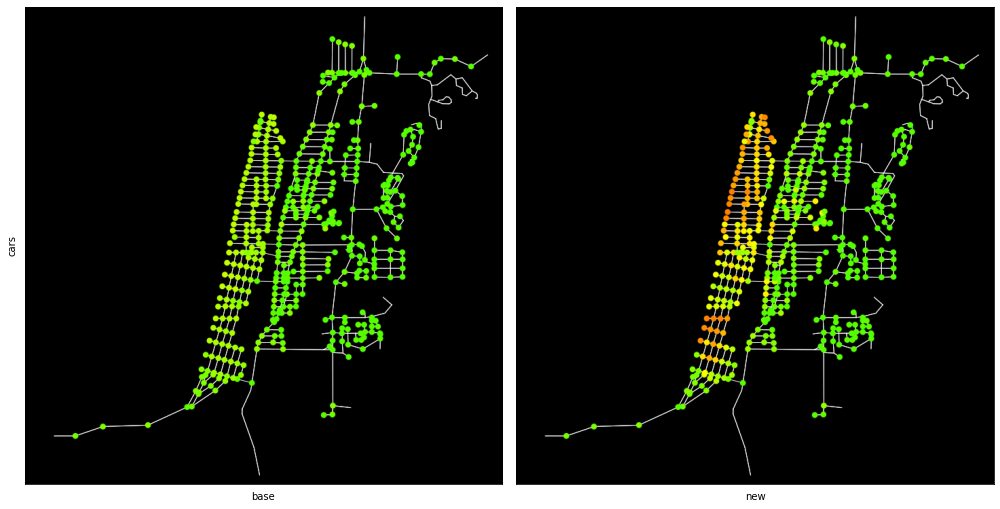

In [57]:
plot_evtimes2d(models)

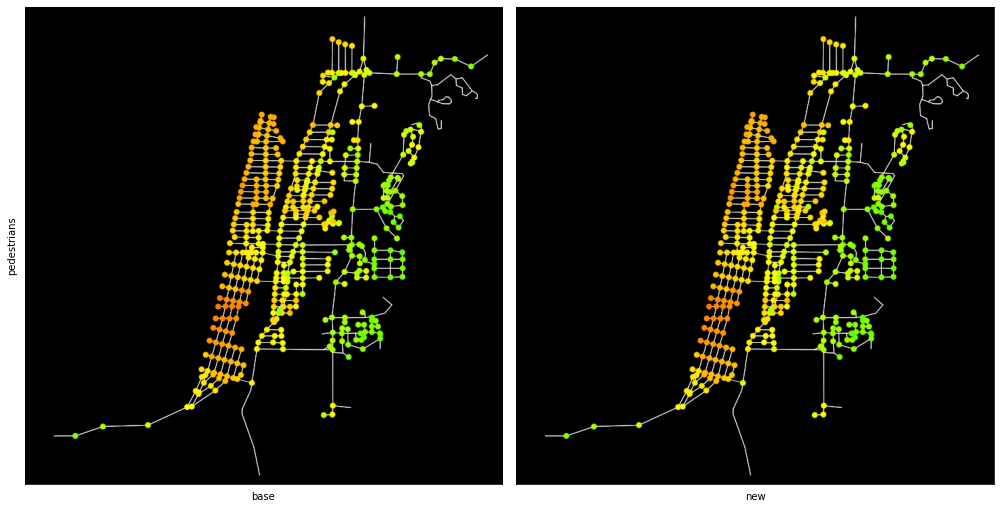

In [58]:
plot_evtimes2d(models, mode="peds")

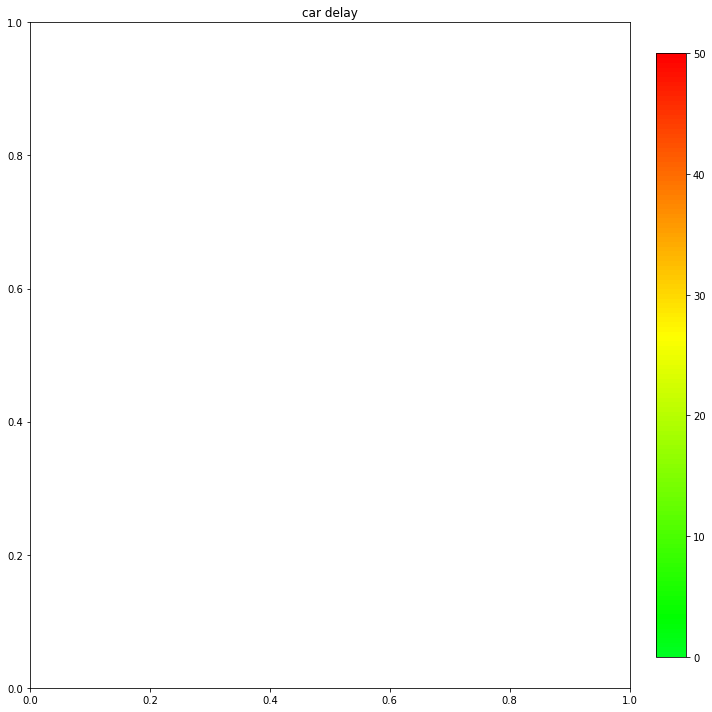

In [71]:
fig, axes = plt.subplots(figsize=(10, 10))

sm = get_colormap(0, 128, 0, 50)

axes.set_title("car delay")
fig.colorbar(sm, fraction=0.046, pad=0.04) #, location="bottom")
fig.tight_layout()

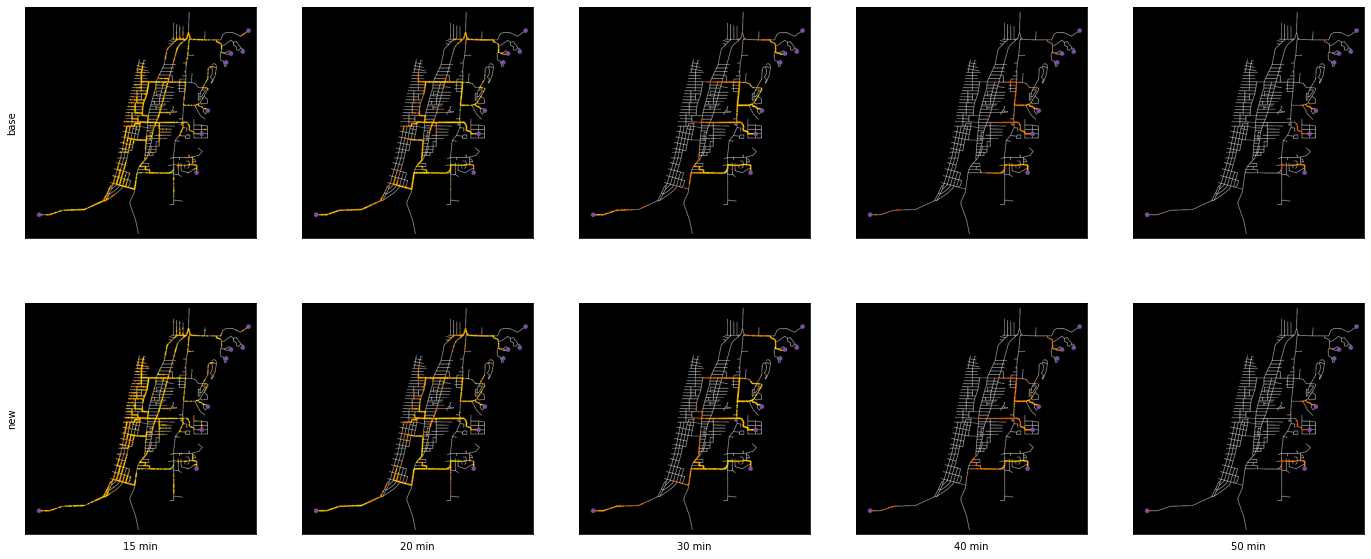

In [60]:
ig, axes = plt.subplots(2, 5, figsize=(24, 10), sharex=True, sharey=True)
models = ["base", "new"]

sm = get_colormap(100, 0, 0, 3.83)

for i, model in enumerate(models):
    for j, time in enumerate([15, 20, 30, 40, 50]):
        img = plt.imread(f"./images/speeds/{model}/peds/{time}.png")

        axes[i, j].imshow(img)
        #axes[i, j].set_title(model + " - " + str(time))
        if i == 1:
            axes[i, j].set_xlabel(f"{time} min")
        if j == 0:
            axes[i, j].set_ylabel(model)
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        #axes[i, j].set_axis_off()

# fig.subplots_adjust(right=0.9)
# cbar_ax = fig.add_axes([0.915, 0.15, 0.01, 0.7])
# fig.colorbar(sm, cax=cbar_ax)
 
fig.tight_layout()

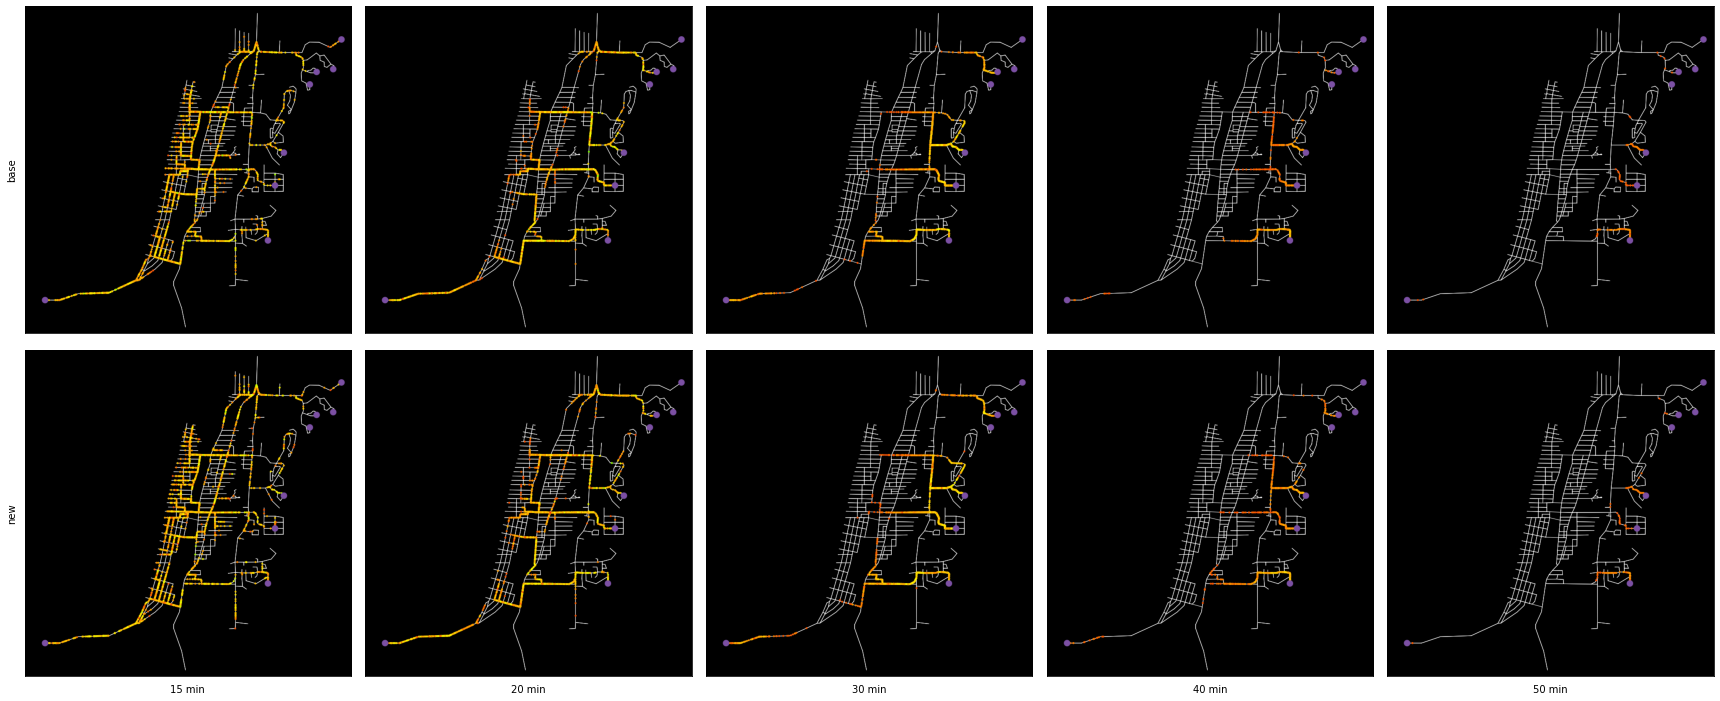

In [61]:
fig, axes = plt.subplots(2, 5, figsize=(24, 10), sharex=True, sharey=True)
models = ["base", "new"]

sm = get_colormap(100, 0, 0, 3.83)

for i, model in enumerate(models):
    for j, time in enumerate([15, 20, 30, 40, 50]):
        img = plt.imread(f"./images/speeds/{model}/peds/{time}.png")

        axes[i, j].imshow(img)
        #axes[i, j].set_title(model + " - " + str(time))
        if i == 1:
            axes[i, j].set_xlabel(f"{time} min")
        if j == 0:
            axes[i, j].set_ylabel(model)
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        #axes[i, j].set_axis_off()

# fig.subplots_adjust(right=0.9)
# cbar_ax = fig.add_axes([0.915, 0.15, 0.01, 0.7])
# fig.colorbar(sm, cax=cbar_ax)
 
fig.tight_layout()

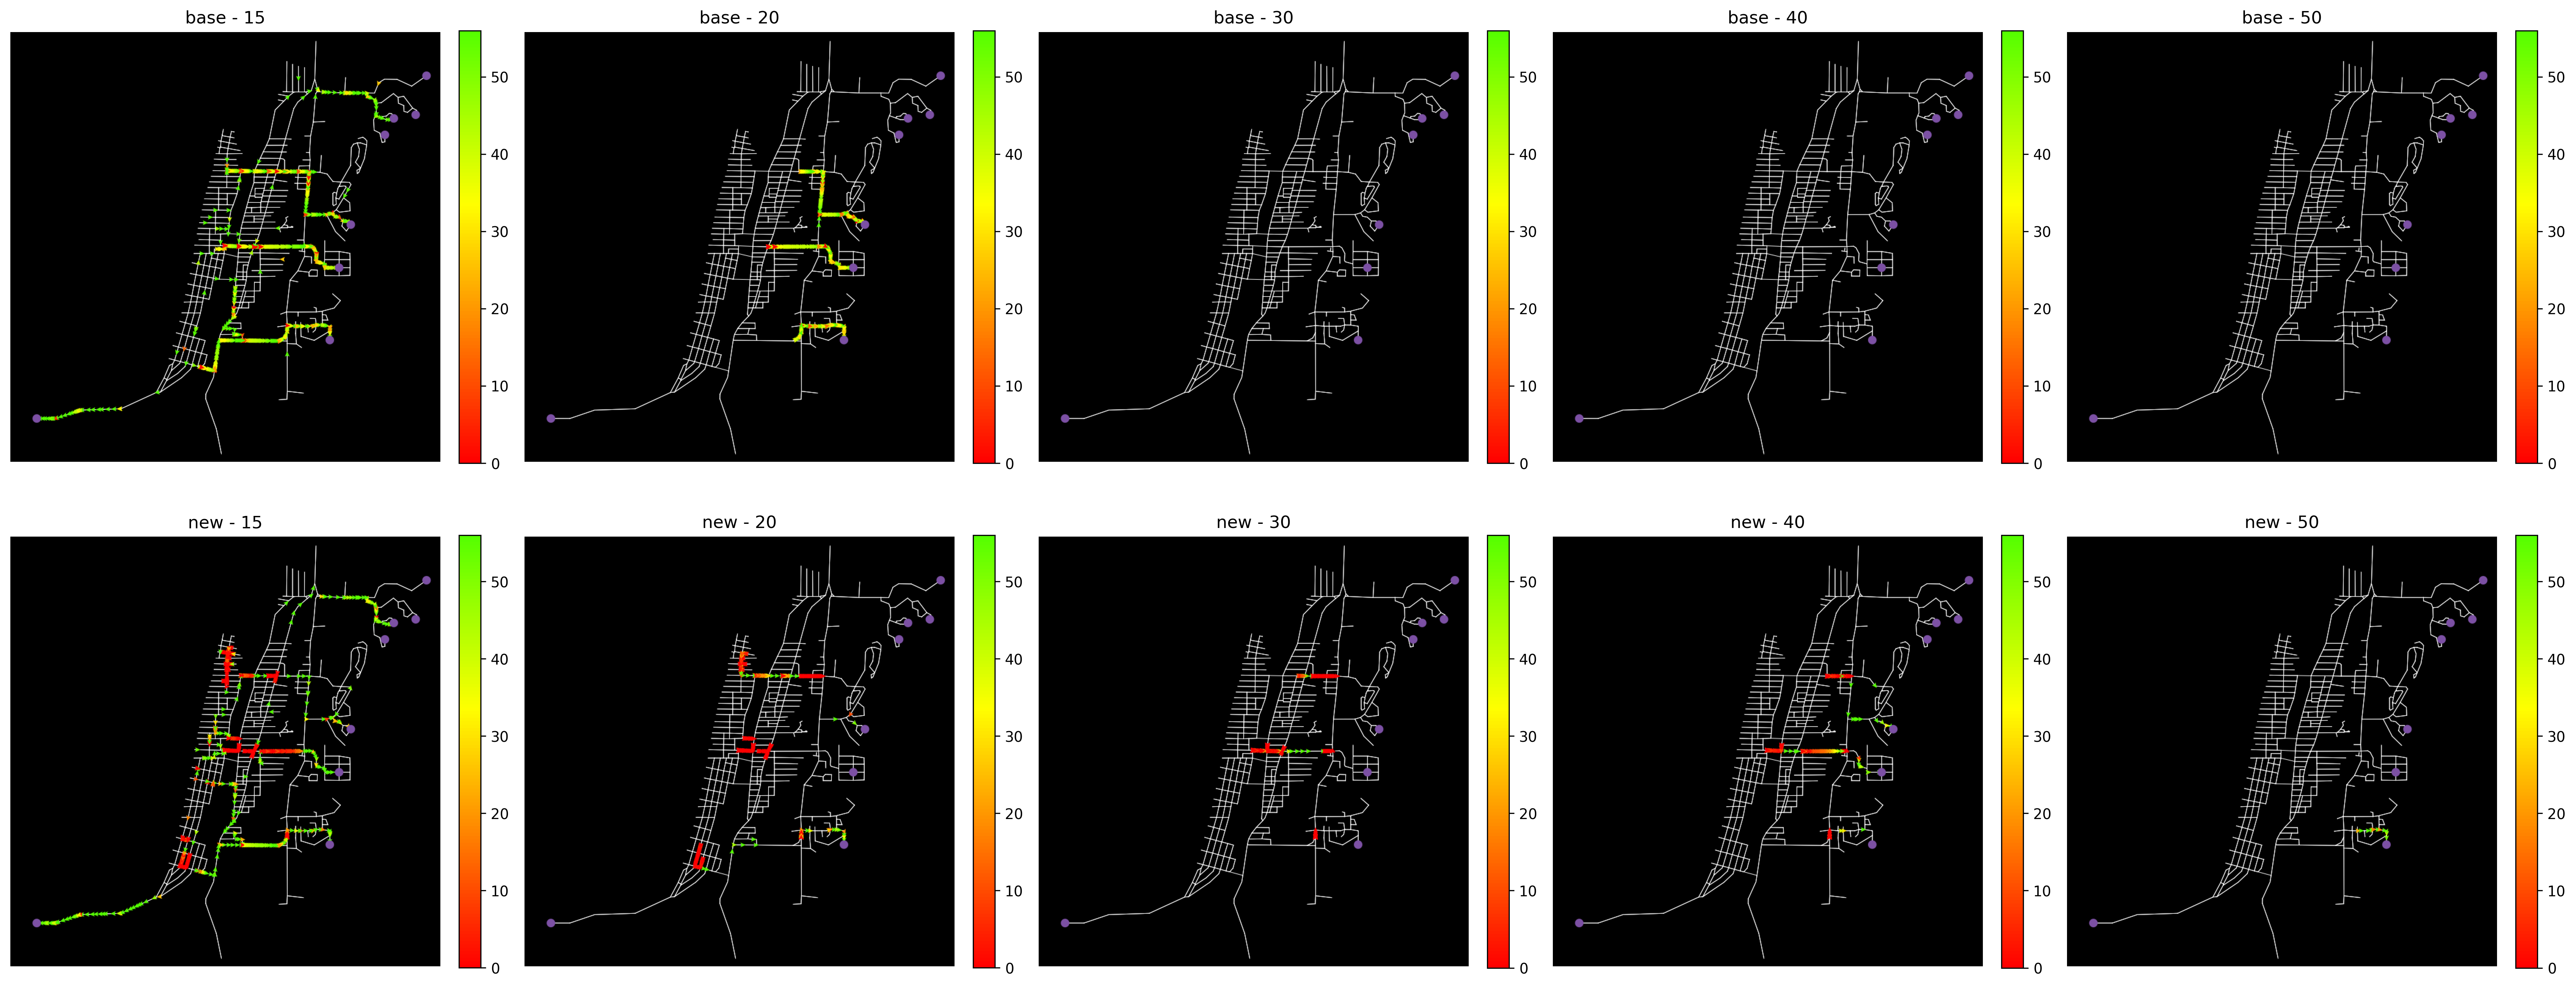

In [62]:
fig, axes = plt.subplots(2, 5, figsize=(25, 10), dpi=300)
models = ["base", "new"]

sm = get_colormap(100, 0, 0, 56)

for i, model in enumerate(models):
    for j, time in enumerate([15, 20, 30, 40, 50]):
        img = plt.imread(f"./images/speeds/{model}/cars/{time}.png")

        axes[i, j].imshow(img)
        axes[i, j].set_title(model + " - " + str(time))
        axes[i, j].set_axis_off()
        fig.colorbar(sm, ax=axes[i, j], fraction=0.046, pad=0.04)

fig.tight_layout()

# 

In [63]:
def plot_critical_links(model, exps, mode="car", mean=True):
    N = len(exps) + 1 if mean else len(exps)

    fig, ax = plt.subplots(N, 1, figsize=(10, 8), sharex=True, sharey=True) # , subplot_kw=dict(projection='3d')

    avg_casualties = pd.DataFrame()
    for i in range(N):
        if i < len(exps):
            exp = exps[i]
            data = pd.read_csv(f"./data/{model}/roads/roads-{exp['N_PEDS']}-{exp['N_CARS']}-mean.csv")

            data = data.set_index(["end1", "end2"])
            data = data.loc[data["minute"] == 60]

            int_data = pd.read_csv(f"./data/{model}/intersections/intersections-{exp['N_PEDS']}-{exp['N_CARS']}-mean.csv")
            int_data = int_data.set_index(["who"])
            int_data = int_data.loc[int_data["minute"] == 60]
            int_data.sort_index()
            int_data = int_data.reset_index()
            int_data[f"{mode}-in-flow"] = int_data[f"{mode}-in-flow"].apply(lambda x:  np.sum(list(map(float, list(parse_list(x).values())))) * 60)
            int_data[f"{mode}-out-flow"] = int_data[f"{mode}-out-flow"].apply(lambda x:  np.sum(list(map(float, list(parse_list(x).values())))) * 60)
            int_data["type"] = int_data["who"].isin(two_way_ints).transform(lambda x: "TWSC" if x else "AWSC")
            # int_data["car-delay"] = int_data["car-delay"] / 60 # minutes

            
            critical_ints = [173, 188, 250, 373, 389, 519] if model == "base" else [128, 140, 152, 173, 188, 201]
            int_data["critical"] =  int_data["who"].isin(critical_ints)

            total = data["casualties"].sum()
            
            data = data.groupby(["end2"])["casualties"].sum()
            data = data.reset_index()

            casualties = data[["end2","casualties"]]
            casualties["casualties"] = casualties["casualties"] / total * 100

            casualties = casualties.join(int_data.set_index(["who"]), on=["end2"], how="inner")
            casualties = casualties.reset_index()
            #print(casualties)

            avg_casualties = pd.concat((avg_casualties, casualties))

            ax[i].set_title(f"Pedestrians: {exp['N_PEDS']}%, Cars: {exp['N_CARS']}%")
        elif N != len(exps):
            casualties = avg_casualties.groupby("end2").mean()
            ax[i].set_title(f"Mean")

        #casualties = casualties.loc[casualties["car-delay"] >= 0.5]

        #ax[i].set_zlim([0, 85])
        ax[i].set_ylabel("casualties")
        ax[i].set_xlabel("car-delay")
        #ax[i].set_zlabel("% casualties")
        #ax[i].scatter(casualties[f"casualties"],casualties["car-delay"], c=casualties["type"].apply(lambda x: "blue" if x == "TWSC" else "orange"))
        sns.scatterplot(casualties, x=f"car-delay", y="casualties", hue="critical", ax=ax[i])

        #ax[i].set_xticks(np.arange(0, 461, 60))

    fig.tight_layout()

    critical_ints = casualties.loc[casualties["casualties"] >= 5.0].copy()
    critical_ints["casualties"] = critical_ints["casualties"].apply(lambda x : f"{x:.1f}%")
    #print(critical_ints)

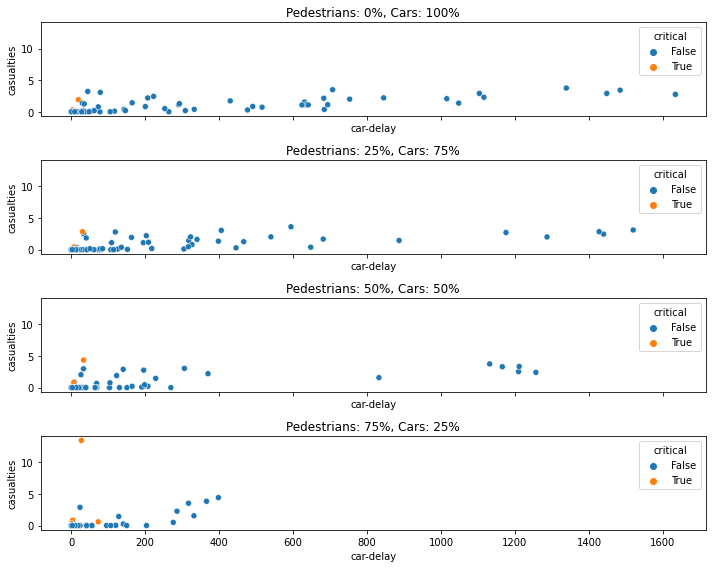

In [64]:
plot_critical_links("new", exps[:4], mean=False)